## Objective 

### A combined-cycle power plant comprises gas turbines, steam turbines, and heat recovery steam generators. In this type of plant, the electricity is generated by gas and steam turbines combined in one cycle. Then, it is transferred from one turbine to another. We have to model the energy generated as a function of exhaust vacuum and ambient variables and use that model to improve the plant's performance. 

## Dataset Details

### This is a project where the variable to be predicted isenergyproduction The data file contains 9568 observations with five variables collected from a combined cycle power plant over six years when the power plant was set to work with a full load. 


### IMPORTING MODULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
import statsmodels.formula.api as smf
import statistics
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
import pickle


### READING CSV FILE

In [2]:
data1=pd.read_csv(r"C:\Users\aksha\OneDrive\Desktop\project\Copy of energy_production (1).csv",sep=';')

### EDA (EXPLORATORY DATA ANALYSIS)

##### EXAMINE THE DATA

In [3]:
data1

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


### temperature, in degrees Celsius
### exhaust_vacuum, in cm Hg
### amb_pressure, in millibar. (Ambient pressure)
### r_humidity, in percentage. (Relative humidity)
### energy_production, in MW, net hourly electrical energy output. 


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


##### CREATING A COPY

In [5]:
data2=data1.copy()

In [6]:
data2.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [7]:
data2.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


#### from data describe we can understand the mean,median,standard deviation of the features
#### range of temperature  is 1.810000--37.110000
#### range of exhaust_vaccum is 25.360000--81.560000
#### range of amb_pressure is 992.890000--1033.300000
#### range of r_humidity is 25.560000--100.160000
#### range of energy_prooduction is 420.260000--495.760000

### Finding Null Values

In [8]:
data2.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

<Axes: >

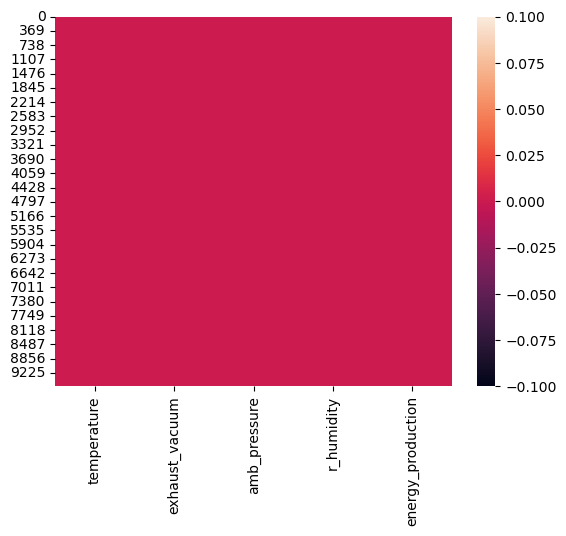

In [9]:
sns.heatmap(data2.isnull())

#### there is no  null values

## Understanding The Features

#### Temperature

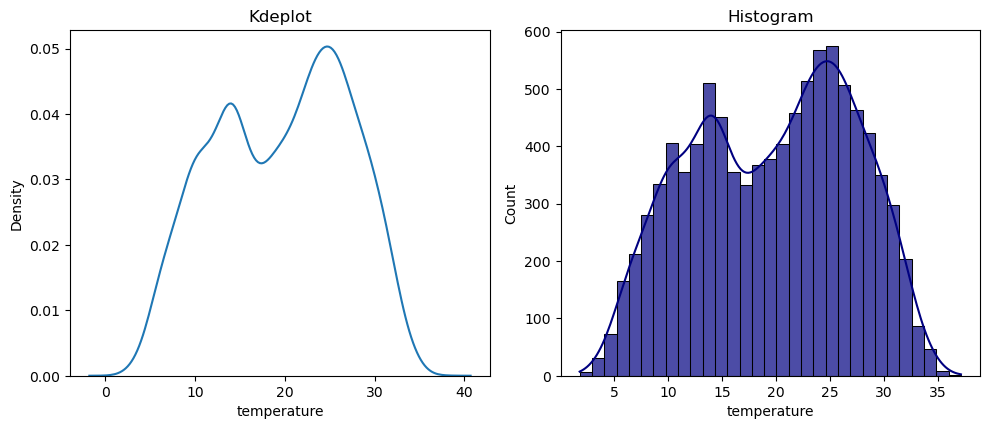

In [10]:
fig=plt.figure(figsize=(10,8))
plt.subplot(2,2, 1)
sns.kdeplot(data2['temperature'],)
plt.title('Kdeplot')

plt.subplot(2,2,2)
sns.histplot(data2['temperature'],kde=True,color='navy',alpha=.7)
plt.title('Histogram')
plt.tight_layout()
plt.show()

In [11]:
print(data2['temperature'].skew())
print(data2['temperature'].kurtosis())

-0.1363930494749227
-1.0375491923092452


### from the kdeplot and histogram we can understand that the temperature is negatively skewed(left skewed) and negative kurtosis (Platykurtic)

#### Exhaust_vacuum

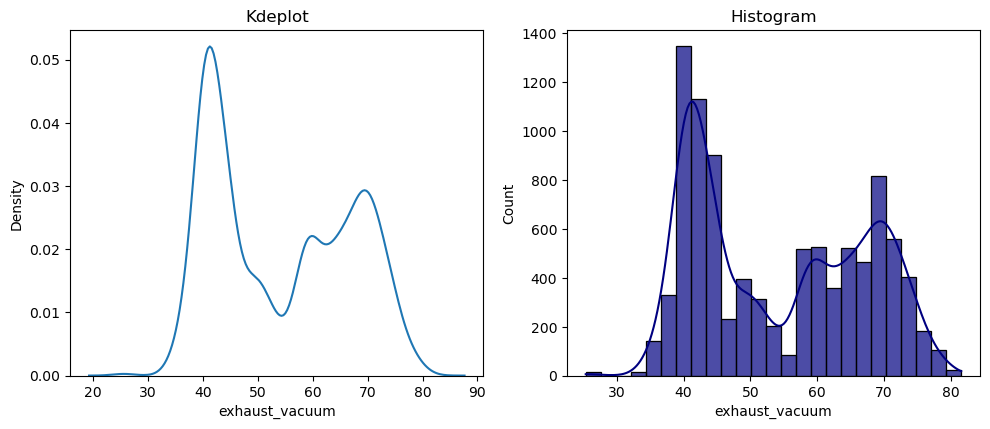

In [12]:
plt.figure(figsize=(10,8))
plt.subplot(221)
sns.kdeplot(data2['exhaust_vacuum'])
plt.title('Kdeplot')
plt.subplot(222)
sns.histplot(data2['exhaust_vacuum'],kde=True,color='navy',alpha=.7)
plt.title('Histogram')
plt.tight_layout()
plt.show()

In [13]:
print(data2['exhaust_vacuum'].skew())
print(data2['exhaust_vacuum'].kurtosis())

0.19852101136676173
-1.4443366772319615


### from the kdeplot and histogram we can understand that the exhaust vaccum is little right skewed and have negative kurtosis (platykurtic)

#### Amb_pressure

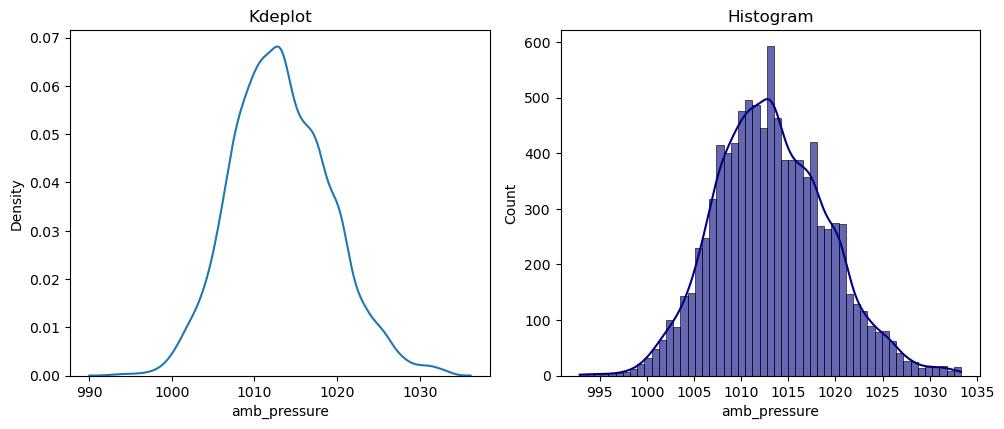

In [14]:
plt.figure(figsize=(10,8))
plt.subplot(221)
sns.kdeplot(data2['amb_pressure'])
plt.title('Kdeplot')
plt.subplot(222)
sns.histplot(data2['amb_pressure'],kde=True,color='navy',alpha=.6)
plt.title('Histogram')
plt.tight_layout()
plt.show()

In [15]:
print(data2['amb_pressure'].skew())
print(data2['amb_pressure'].kurtosis())

0.26544469358258616
0.09423719530331276


### from the kdeplot we can understand that the amb_pressure is slightly right skewed and have slight positive kurtosis(Leptokurtic)

#### R_humidity

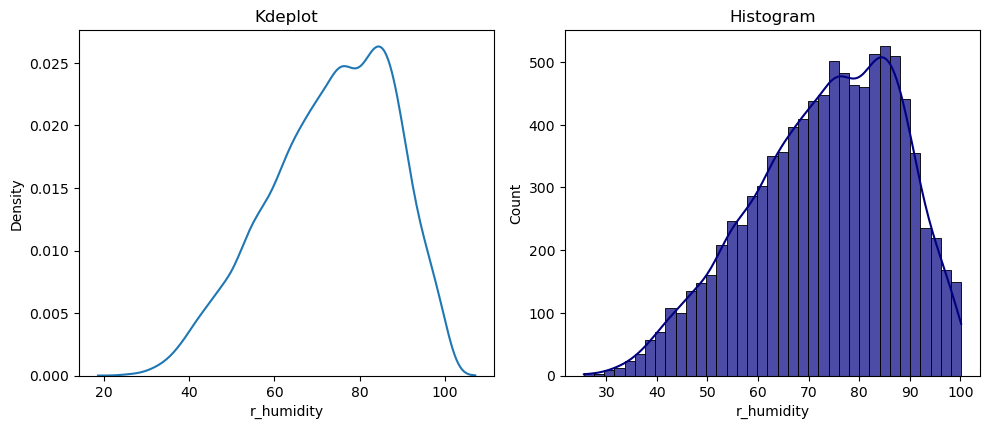

In [16]:
plt.figure(figsize=(10,8))
plt.subplot(221)
sns.kdeplot(data2['r_humidity'])
plt.title('Kdeplot')
plt.subplot(222)
sns.histplot(data2['r_humidity'],kde=True,color='navy',alpha=.7)
plt.title('Histogram')
plt.tight_layout()
plt.show()

In [17]:
print(data2['r_humidity'].skew())
print(data2['r_humidity'].kurtosis())

-0.4318387491833359
-0.4445263744874066


### from the kdeplot and histogram it shows that the r_humidity is left skewed  and it is platykurtic

#### Energy_production

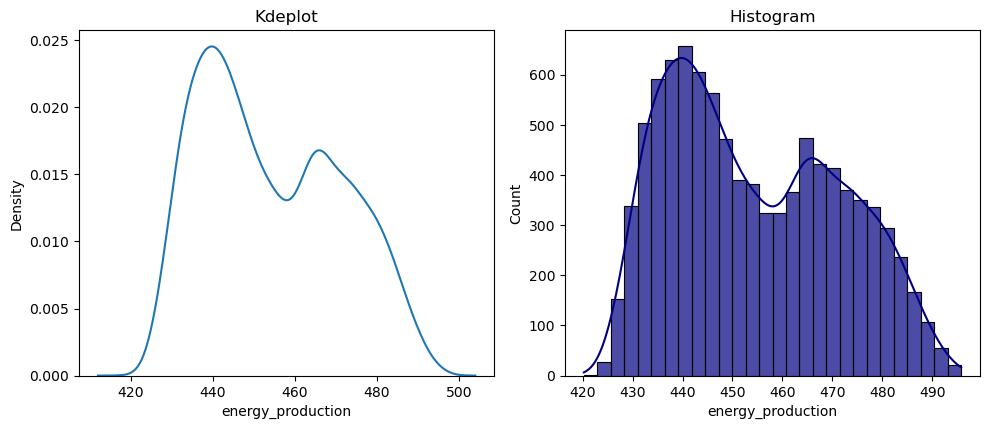

In [18]:
plt.figure(figsize=(10,8))
plt.subplot(221)
sns.kdeplot(data2['energy_production'])
plt.title('Kdeplot')
plt.subplot(222)
sns.histplot(data2['energy_production'],kde=True,color='navy',alpha=.7)
plt.title('Histogram')
plt.tight_layout()
plt.show()

In [19]:
print(data2['energy_production'].skew())
print(data2['energy_production'].kurtosis())

0.30650943542040227
-1.0485209686925079


### from the kdeplot and histogram it shows that the energy_production have slight positive skew and it is platykurtic

### CORRELATION

#### 1. USING  COORELATION COEFFICIENT R

In [20]:
data2.corr()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
amb_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
r_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_production,-0.948128,-0.869780,0.518429,0.389794,1.000000


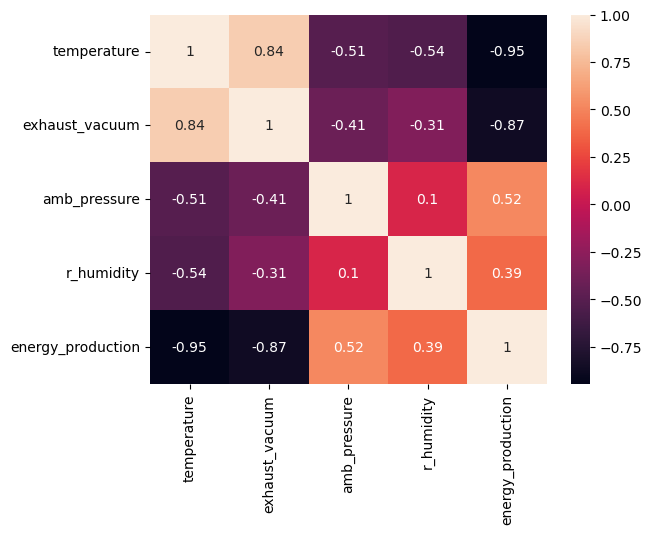

In [21]:
sns.heatmap(data2.corr(),annot=True)
plt.show()

<Figure size 1900x1000 with 0 Axes>

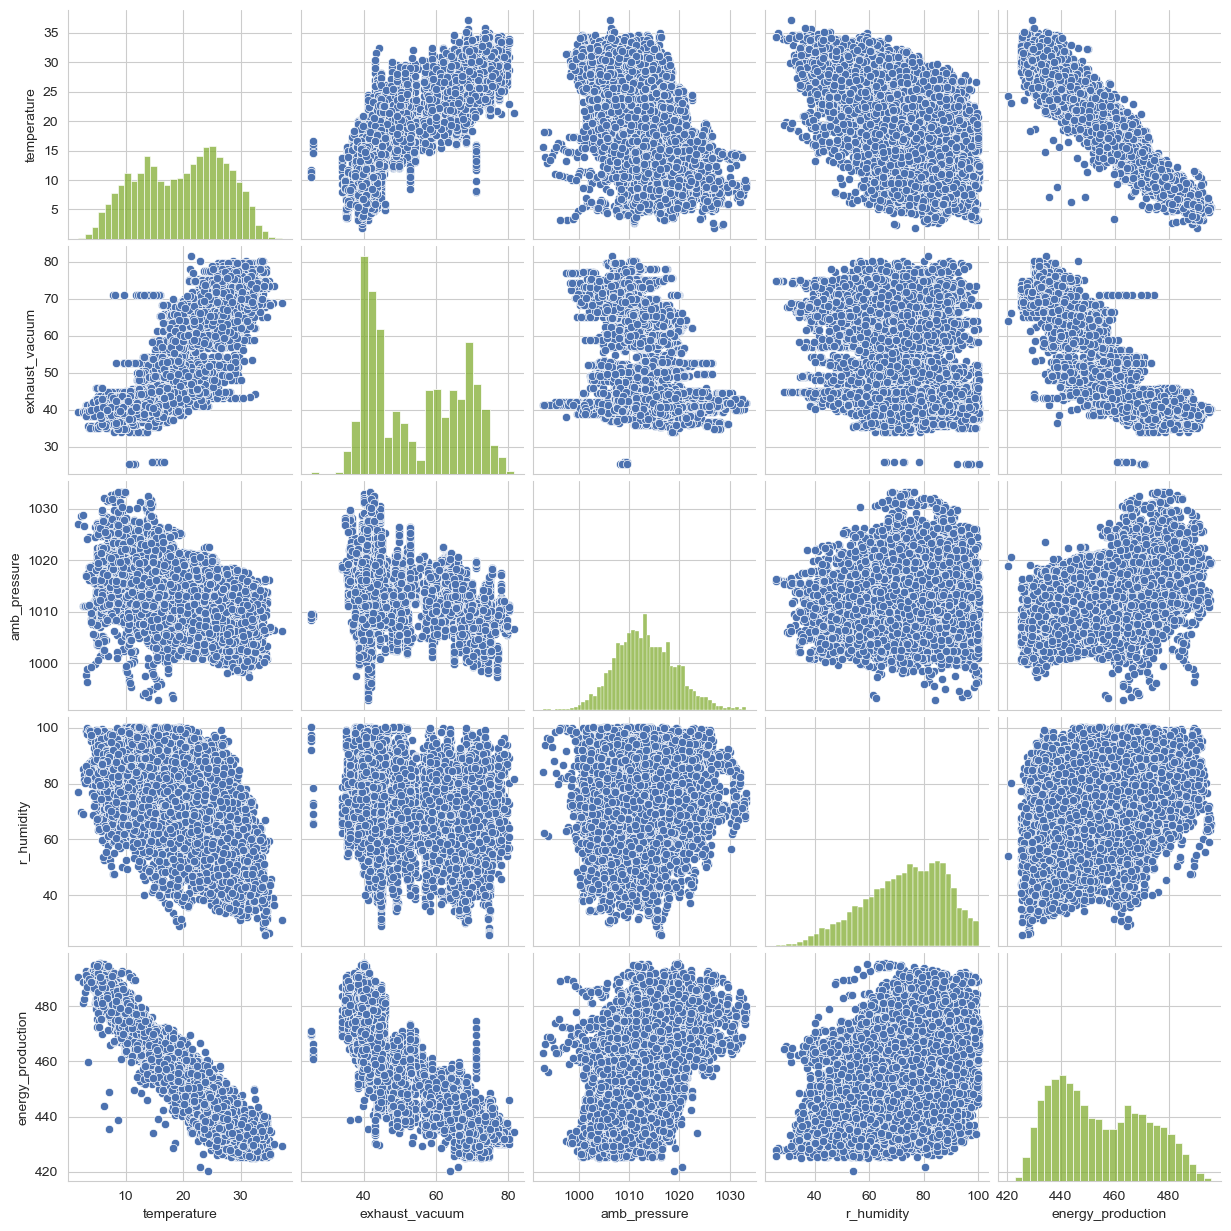

In [22]:
plt.figure(figsize=(19,10))
sns.set_palette('deep')
sns.set_style(style='whitegrid')
sns.pairplot(data2,diag_kws= {'color': '#82ad32'},corner=False)

Text(0.5, 1.0, 'correlation of Energy_Production with features')

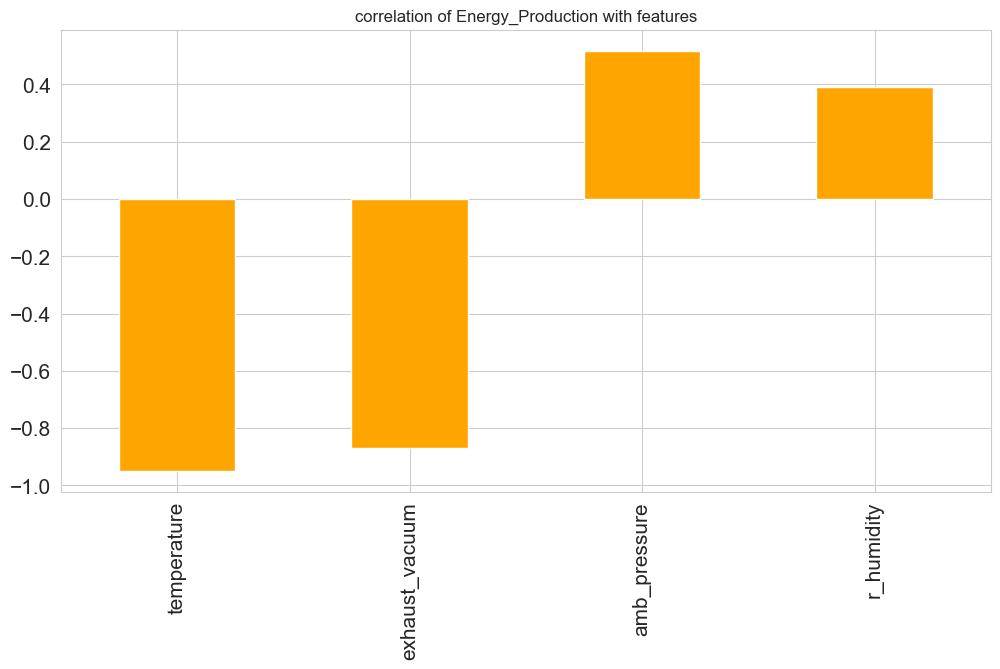

In [23]:
corre=data2.corrwith(data2['energy_production'])
corre=corre[:4]
corre.plot.bar( figsize = (12,6), 
        fontsize = 15, 
        color = 'orange',
        rot = 90, grid = True)
plt.title('correlation of Energy_Production with features')

### From the pairplot and heatmap , we can understand that energy_production and temperature is highly negatively correlated ,exhaust_vacuum and temperature  is highly positively correlated

### As per the rules of regression the  features(X) should be highly correlated with the target(Y) and features(X) should be completely independent on features(x) that is there should be no correlation within the features.if there is a correlation within the features then this problem is called multicollinearity problem

### here we can clearly see that  exhaust_vacuum and temperature  have negative high  correlation with energy production


### While exhaust_vacuum  is highly positively correlated with Temperature this is multicollinearity problem

In [24]:
m1=smf.ols('temperature~exhaust_vacuum',data=data2).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                 2.371e+04
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:06:48   Log-Likelihood:                -26830.
No. Observations:                9568   AIC:                         5.366e+04
Df Residuals:                    9566   BIC:                         5.368e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -7.2313      0.179    -40.330      0.000      -7.583      -6.880
exhaust_vacuum     0.4950      0.003    153.977      0.000       0.489       0.501
==============================================================================
Omnibus:                       67.531   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.843
Skew:                           0.169   Prob(JB):                     9.23e-17
Kurtosis:                       3.267   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### energy_production~exhaust_vacuum have high R-square ,so this is multicollinearity problem we need to drop one feature

In [25]:
m2=smf.ols('energy_production~exhaust_vacuum',data=data2).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:06:48   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        517.8015      0.378   1370.218      0.000     517.061     518.542
exhaust_vacuum    -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
m3=smf.ols('energy_production~temperature',data=data2).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      energy_production   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:06:48   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     497.0341      0.156   3177.280      0.000     496.727     497.341
temperature    -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF

In [27]:
rsquare_temp=smf.ols('temperature~exhaust_vacuum+r_humidity+amb_pressure',data=data2).fit().rsquared  
vif_temp=1/(1-rsquare_temp)

rsquare_vacc=smf.ols('exhaust_vacuum~r_humidity+amb_pressure+temperature',data=data2).fit().rsquared  
vif_vacc=1/(1-rsquare_vacc)

rsquare_hum=smf.ols('r_humidity~amb_pressure+temperature+exhaust_vacuum',data=data2).fit().rsquared  
vif_hum=1/(1-rsquare_hum)

rsquare_amb=smf.ols('amb_pressure~temperature+exhaust_vacuum+r_humidity',data=data2).fit().rsquared  
vif_amb=1/(1-rsquare_amb)

vif_df=pd.DataFrame({'Features':['Temperature','Exhaust Vacuum','Relative humidity','Ambient Pressure'],
                    'VIF':[vif_temp,vif_vacc,vif_hum,vif_amb]})
vif_df

,Features,VIF
0,Temperature,5.977602
1,Exhaust Vacuum,3.943003
2,Relative humidity,1.705290
3,Ambient Pressure,1.452639


### from the VIF we can understand that the VIF values are low so we dont want to drop any features

### PREDICTIVE POWER SCORE

#### R COEFFICIENT IS USED TO FIND THE STRENGTH OF LINEAR RELATIONSHIP BETWEEN DATAS.SOMETIMES DATAS MIGHT HAVE SOME NON LINEAR RELATIONSHIP ,TO FIND THOSE RELATIONSHIP WE USE PREDICTIVE POWER SCORE

In [28]:
pps_matrix=pps.matrix(data2)
pps_matrix[pps_matrix.ppscore!=1]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
1,temperature,exhaust_vacuum,0.487096,regression,True,mean absolute error,11.661602,5.981283,DecisionTreeRegressor()
2,temperature,amb_pressure,0.000000,regression,True,mean absolute error,4.722114,5.062212,DecisionTreeRegressor()
3,temperature,r_humidity,0.000000,regression,True,mean absolute error,11.950882,12.221565,DecisionTreeRegressor()
4,temperature,energy_production,0.655258,regression,True,mean absolute error,14.807238,5.104681,DecisionTreeRegressor()
5,exhaust_vacuum,temperature,0.651355,regression,True,mean absolute error,6.433324,2.242948,DecisionTreeRegressor()
7,exhaust_vacuum,amb_pressure,0.710536,regression,True,mean absolute error,4.722114,1.366881,DecisionTreeRegressor()
8,exhaust_vacuum,r_humidity,0.230988,regression,True,mean absolute error,11.950882,9.190371,DecisionTreeRegressor()
9,exhaust_vacuum,energy_production,0.733050,regression,True,mean absolute error,14.807238,3.952787,DecisionTreeRegressor()
10,amb_pressure,temperature,0.016444,regression,True,mean absolute error,6.433324,6.327535,DecisionTreeRegressor()
11,amb_pressure,exhaust_vacuum,0.036063,regression,True,mean absolute error,11.661602,11.241047,DecisionTreeRegressor()


#### PREDICTIVE POWER SCORE >0.5

In [29]:
pps_matrix[pps_matrix.ppscore>0.5].sort_values(by='ppscore')

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
21,energy_production,exhaust_vacuum,0.538861,regression,True,mean absolute error,11.661602,5.377618,DecisionTreeRegressor()
20,energy_production,temperature,0.622261,regression,True,mean absolute error,6.433324,2.430119,DecisionTreeRegressor()
5,exhaust_vacuum,temperature,0.651355,regression,True,mean absolute error,6.433324,2.242948,DecisionTreeRegressor()
4,temperature,energy_production,0.655258,regression,True,mean absolute error,14.807238,5.104681,DecisionTreeRegressor()
7,exhaust_vacuum,amb_pressure,0.710536,regression,True,mean absolute error,4.722114,1.366881,DecisionTreeRegressor()
9,exhaust_vacuum,energy_production,0.733050,regression,True,mean absolute error,14.807238,3.952787,DecisionTreeRegressor()
0,temperature,temperature,1.000000,predict_itself,True,None,0.000000,1.000000,None
6,exhaust_vacuum,exhaust_vacuum,1.000000,predict_itself,True,None,0.000000,1.000000,None
12,amb_pressure,amb_pressure,1.000000,predict_itself,True,None,0.000000,1.000000,None
18,r_humidity,r_humidity,1.000000,predict_itself,True,None,0.000000,1.000000,None


#### PREDICTIVE POWER SCORE < 0.5

In [30]:
pps_matrix[pps_matrix.ppscore<0.5].sort_values(by='ppscore')

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
2,temperature,amb_pressure,0.000000,regression,True,mean absolute error,4.722114,5.062212,DecisionTreeRegressor()
3,temperature,r_humidity,0.000000,regression,True,mean absolute error,11.950882,12.221565,DecisionTreeRegressor()
13,amb_pressure,r_humidity,0.000000,regression,True,mean absolute error,11.950882,14.794567,DecisionTreeRegressor()
15,r_humidity,temperature,0.000000,regression,True,mean absolute error,6.433324,6.616687,DecisionTreeRegressor()
16,r_humidity,exhaust_vacuum,0.000000,regression,True,mean absolute error,11.661602,12.644933,DecisionTreeRegressor()
17,r_humidity,amb_pressure,0.000000,regression,True,mean absolute error,4.722114,6.152887,DecisionTreeRegressor()
19,r_humidity,energy_production,0.000000,regression,True,mean absolute error,14.807238,16.643045,DecisionTreeRegressor()
22,energy_production,amb_pressure,0.000000,regression,True,mean absolute error,4.722114,5.328756,DecisionTreeRegressor()
23,energy_production,r_humidity,0.000000,regression,True,mean absolute error,11.950882,14.370391,DecisionTreeRegressor()
10,amb_pressure,temperature,0.016444,regression,True,mean absolute error,6.433324,6.327535,DecisionTreeRegressor()


## Outliers 

#### 1.Box Plot

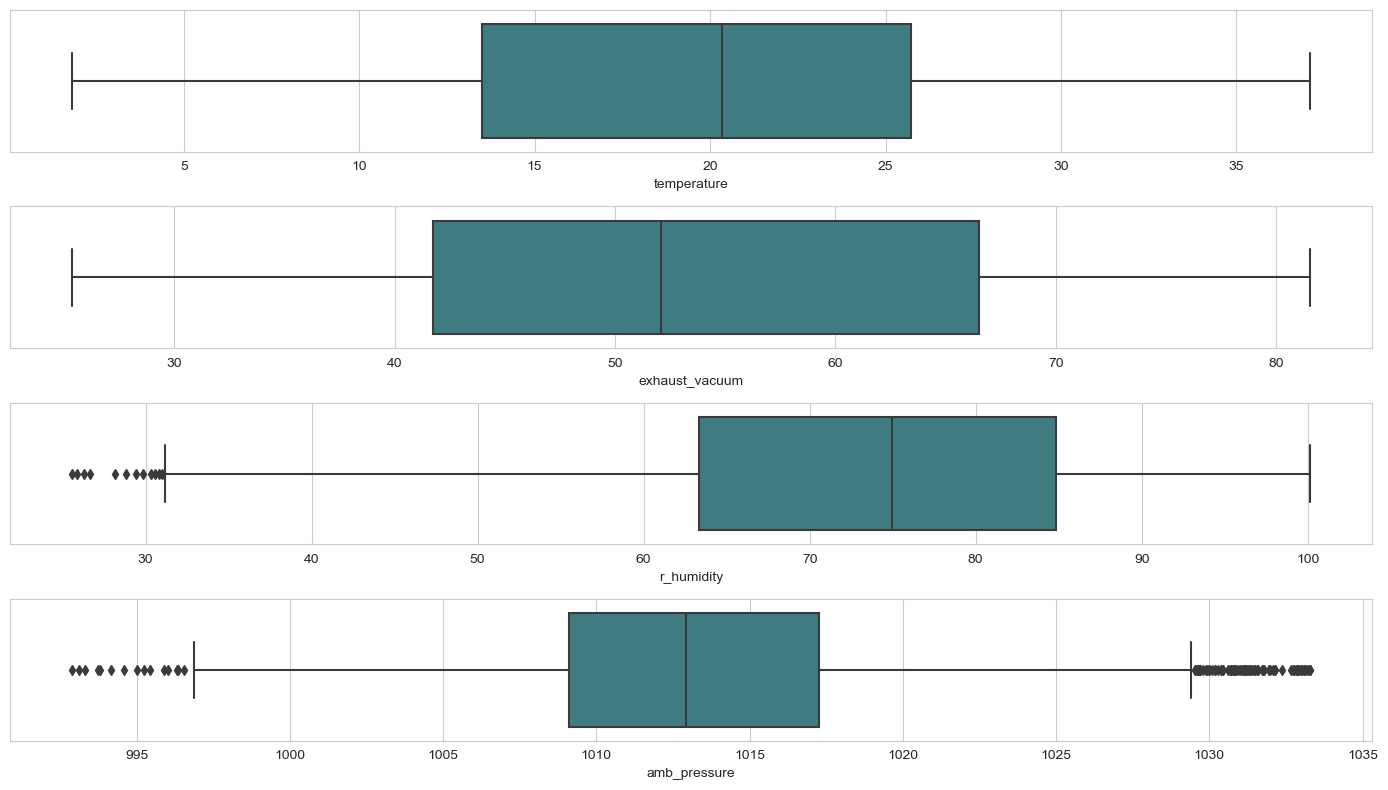

In [31]:
fig,axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='temperature',data=data2,palette='crest',ax=axes[0])
sns.boxplot(x='exhaust_vacuum',data=data2,palette='crest',ax=axes[1])
sns.boxplot(x='r_humidity',data=data2,palette='crest',ax=axes[2])
sns.boxplot(x='amb_pressure',data=data2,palette='crest',ax=axes[3])
fig.tight_layout()

<Axes: >

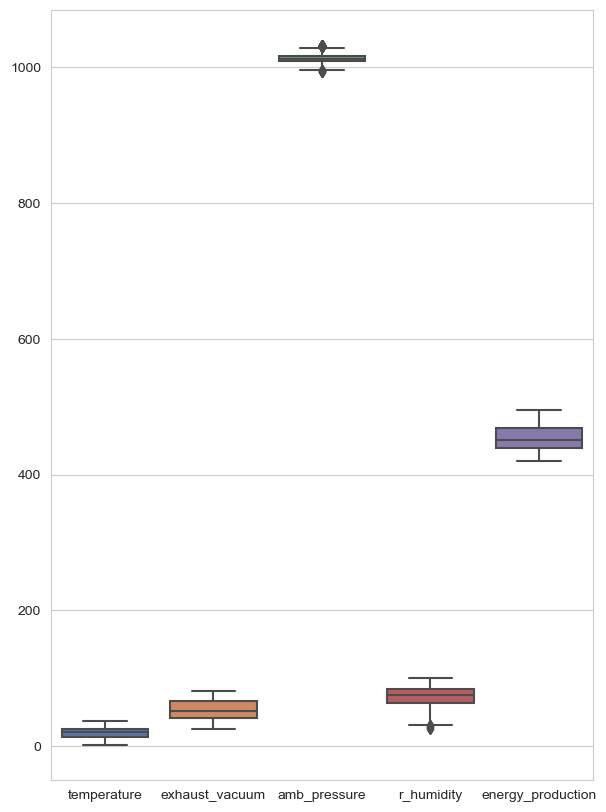

In [32]:
plt.figure(figsize=(7,10))
sns.boxplot(data2)

#### 2.Histogram

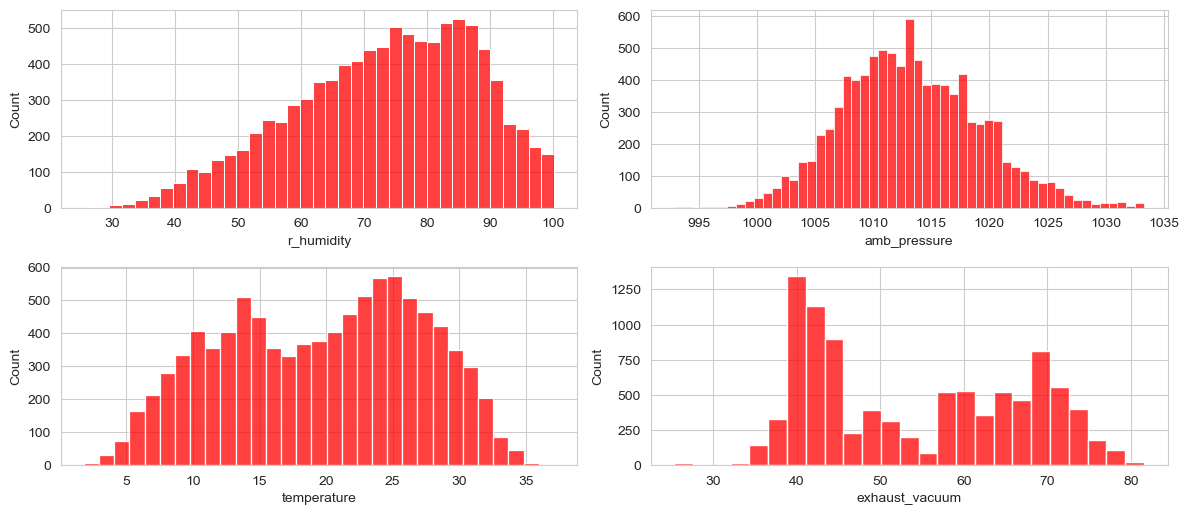

In [33]:
plt.figure(figsize=(12,10))
plt.subplot(421)
sns.histplot(data2['r_humidity'],color='red')
plt.subplot(422)
sns.histplot(data2['amb_pressure'],color='red')
plt.subplot(423)
sns.histplot(data2['temperature'],color='red')
plt.subplot(424)
sns.histplot(data2['exhaust_vacuum'],color='red')
plt.tight_layout()

#### 3 z score methode

In [34]:
z_scores = zscore(data2)

# Identify outliers
outliers1 = (abs(z_scores) > 3).any(axis=1)

# Remove outliers
df_no_outliers = data2[~outliers1]
df_no_outliers


,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


In [35]:
data3=data2.copy()

#### 4.1. Median imputation methode

In [36]:
def outlier_median_imputation(data, column_name):
    q1 = data[column_name].quantile(0.25)
    q3 = data[column_name].quantile(0.75)
    iqr = q3 - q1
    median_value = data[column_name].median()

    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr

    data[column_name] = data[column_name].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

    return data


In [37]:
data3=outlier_median_imputation(data3,'amb_pressure')

In [38]:
data3=outlier_median_imputation(data3,'temperature')

In [39]:
data3=outlier_median_imputation(data3,'exhaust_vacuum')

In [40]:
data3=outlier_median_imputation(data3,'r_humidity')

In [41]:
data3.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.147259,73.367116,454.365009
std,7.452473,12.707893,5.676691,14.514065,17.066995
min,1.810000,25.360000,996.870000,31.150000,420.260000
25%,13.510000,41.740000,1009.140000,63.390000,439.750000
50%,20.345000,52.080000,1012.940000,74.977500,451.550000
75%,25.720000,66.540000,1017.102500,84.830000,468.430000
max,37.110000,81.560000,1029.410000,100.160000,495.760000


#### Box plot after Median imputation

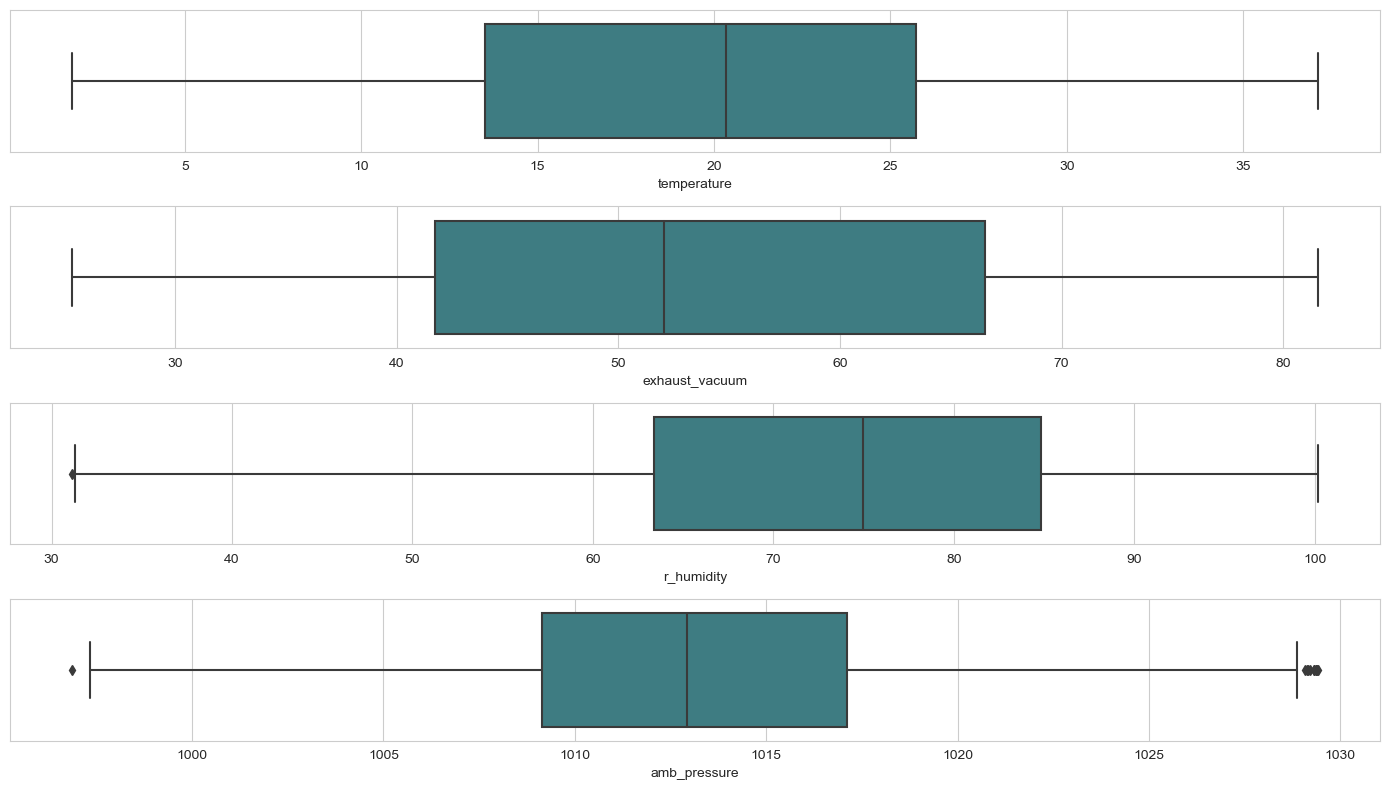

In [42]:
fig,axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='temperature',data=data3,palette='crest',ax=axes[0])
sns.boxplot(x='exhaust_vacuum',data=data3,palette='crest',ax=axes[1])
sns.boxplot(x='r_humidity',data=data3,palette='crest',ax=axes[2])
sns.boxplot(x='amb_pressure',data=data3,palette='crest',ax=axes[3])
fig.tight_layout()

#### Creating a model for median imputation 

In [43]:
model_median=smf.ols('energy_production~temperature+amb_pressure+r_humidity+exhaust_vacuum',data=data3).fit()

In [44]:
print(model_median.rsquared)
print(model_median.rsquared_adj)

0.9286537998661617
0.9286239572644117


#### 4.2.Mean imputation

In [45]:
data4=data2.copy()

In [46]:
def outlier_mean_imputation(data,column_name):
    q1=data[column_name].quantile(0.25)
    q3=data[column_name].quantile(0.75)
    iqr=q3-q1
    mean_value=data[column_name].mean()
    upper_bound=q3 + 1.5 * iqr
    lower_bound=q1 - 1.5 * iqr
    data[column_name]=data[column_name].apply(lambda x: mean_value if x < lower_bound or x > upper_bound else x)
    return data

In [47]:
data4=outlier_mean_imputation(data4,'amb_pressure')

In [48]:
data4=outlier_mean_imputation(data4,'r_humidity')

In [49]:
data4=outlier_mean_imputation(data4,'temperature')

In [50]:
data4=outlier_mean_imputation(data4,'exhaust_vacuum')

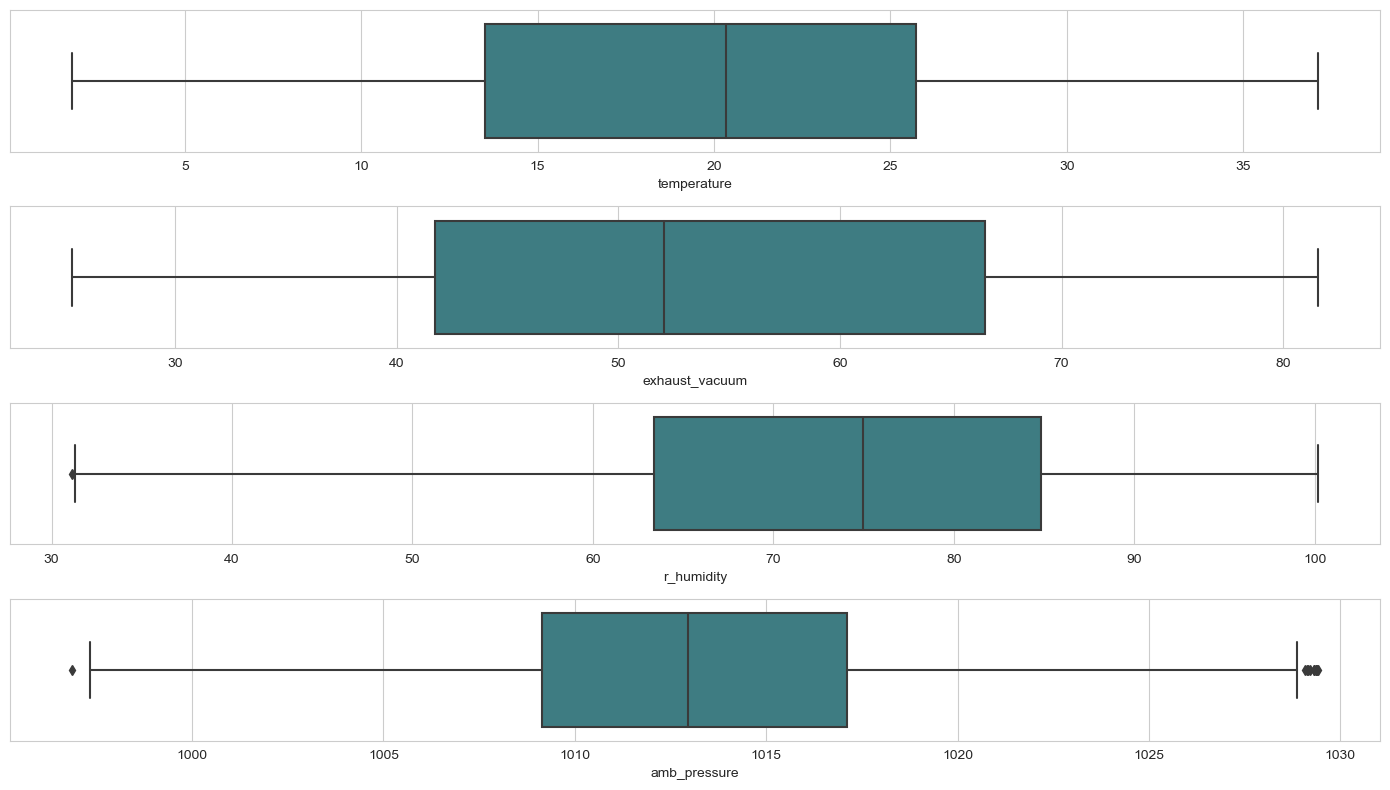

In [51]:
fig,axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='temperature',data=data4,palette='crest',ax=axes[0])
sns.boxplot(x='exhaust_vacuum',data=data4,palette='crest',ax=axes[1])
sns.boxplot(x='r_humidity',data=data4,palette='crest',ax=axes[2])
sns.boxplot(x='amb_pressure',data=data4,palette='crest',ax=axes[3])
fig.tight_layout()

#### Creating a model for mean imputation

In [52]:
model_mean=smf.ols('energy_production~temperature+amb_pressure+r_humidity+exhaust_vacuum',data=data4).fit()

In [53]:
print(model_mean.rsquared)
print(model_mean.rsquared_adj)

0.9286663897896819
0.9286365524540298


#### 4.3 Lower,Upper Imputation

In [54]:
def lower_upper(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    
    iqr=q3-q1
    
    lower_bound=q3-1.5*iqr
    upper_bound=q3+1.5*iqr
    
    data[col]=data[col].apply(lambda x :lower_bound if x<lower_bound else (upper_bound if x >upper_bound else x))
    return data

In [55]:
data5=data2.copy()

In [56]:
data5=lower_upper(data5,'amb_pressure')
data5=lower_upper(data5,'temperature')
data5=lower_upper(data5,'r_humidity')
data5=lower_upper(data5,'exhaust_vacuum')

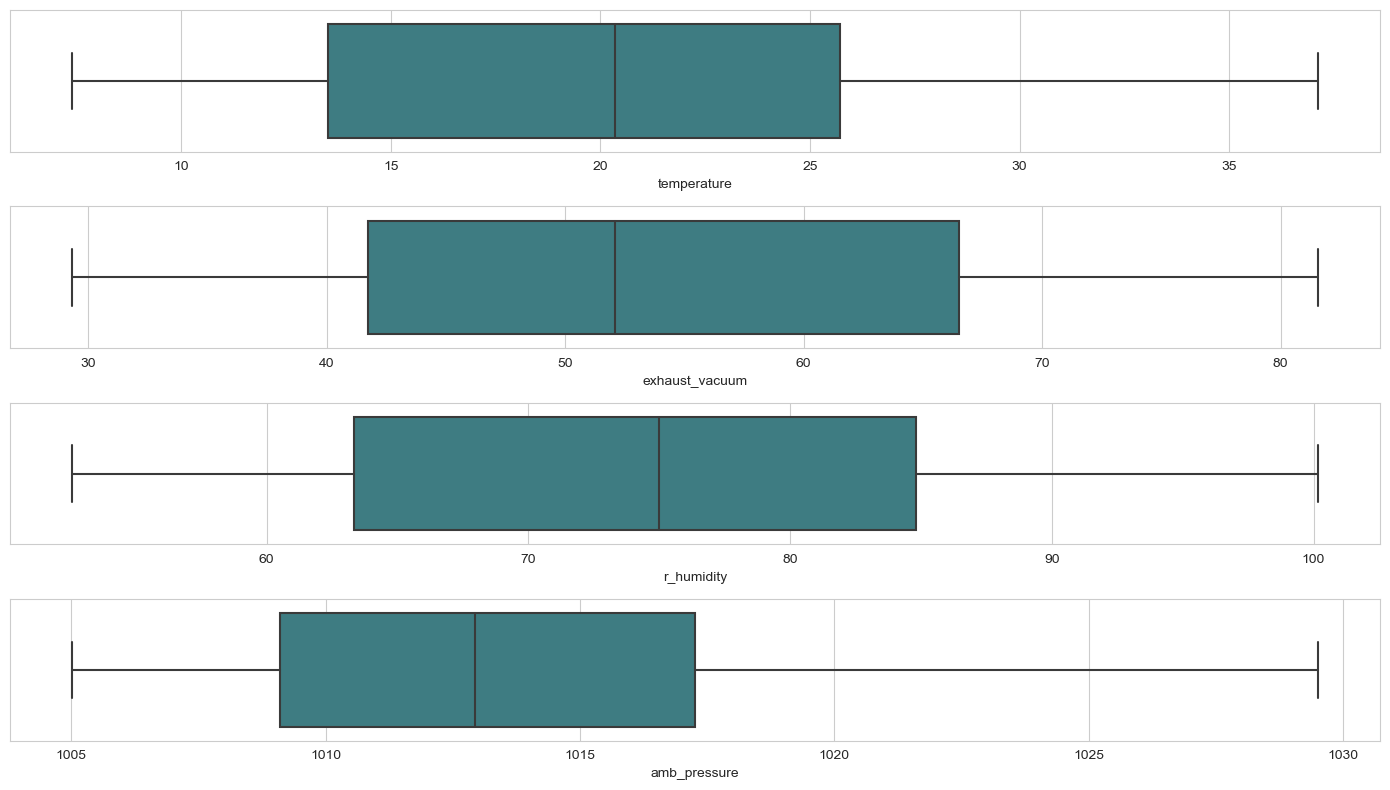

In [57]:
fig,axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='temperature',data=data5,palette='crest',ax=axes[0])
sns.boxplot(x='exhaust_vacuum',data=data5,palette='crest',ax=axes[1])
sns.boxplot(x='r_humidity',data=data5,palette='crest',ax=axes[2])
sns.boxplot(x='amb_pressure',data=data5,palette='crest',ax=axes[3])
fig.tight_layout()

#### Creating a model for upper,lower imputation

In [58]:
model_upper_lower=smf.ols('energy_production~temperature+amb_pressure+r_humidity+exhaust_vacuum',data=data5).fit()

In [59]:
print(model_upper_lower.rsquared)
print(model_upper_lower.rsquared_adj)

0.9245658786451066
0.9245343261526441


## From these we can understand that the r squares a similar

### Transformations to understand the possible changes in the distribution

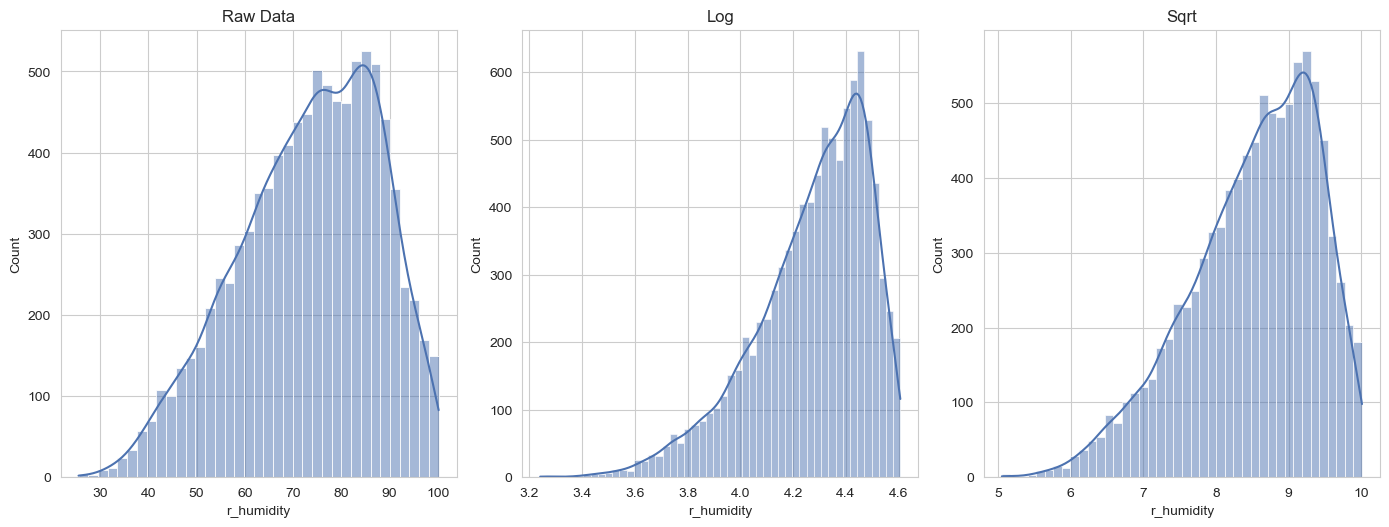

In [60]:
plt.figure(figsize=(14,10))
plt.subplot(231)
sns.histplot(data2['r_humidity'],kde=True)
plt.title('Raw Data')
plt.subplot(232)
sns.histplot(np.log(data2['r_humidity']),kde=True)
plt.title('Log')
plt.subplot(233)
sns.histplot(np.sqrt(data2['r_humidity']),kde=True)
plt.title('Sqrt')
plt.tight_layout()
plt.show()

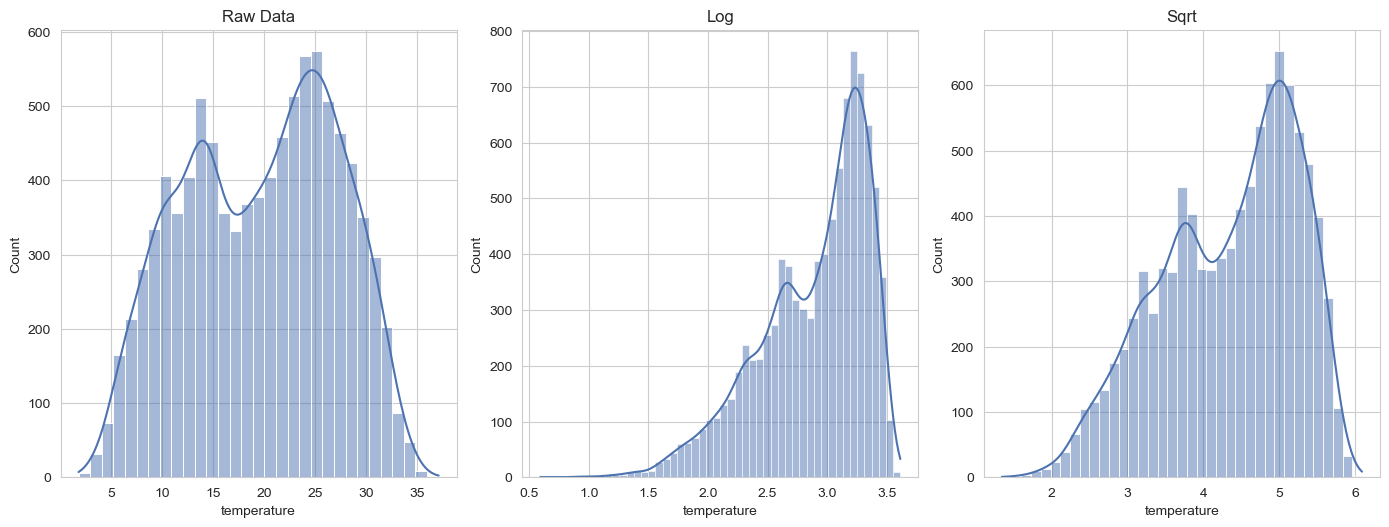

In [61]:
plt.figure(figsize=(14,10))
plt.subplot(231)
sns.histplot(data2['temperature'],kde=True)
plt.title('Raw Data')
plt.subplot(232)
sns.histplot(np.log(data2['temperature']),kde=True)
plt.title('Log')
plt.subplot(233)
sns.histplot(np.sqrt(data2['temperature']),kde=True)
plt.title('Sqrt')
plt.tight_layout()
plt.show()

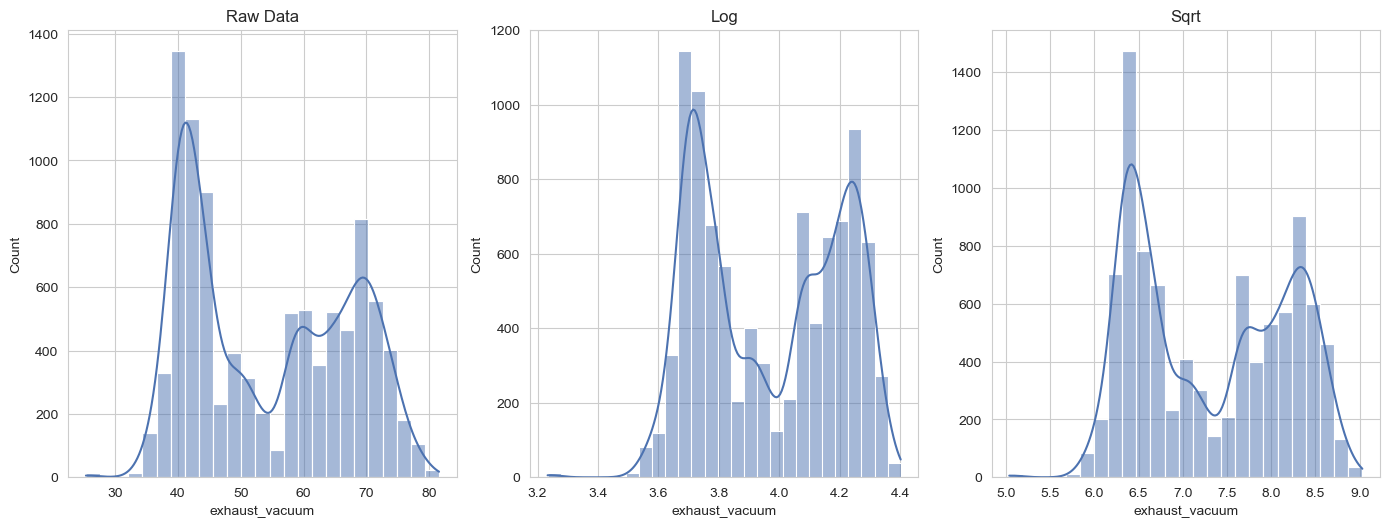

In [62]:
plt.figure(figsize=(14,10))
plt.subplot(231)
sns.histplot(data2['exhaust_vacuum'],kde=True)
plt.title('Raw Data')
plt.subplot(232)
sns.histplot(np.log(data2['exhaust_vacuum']),kde=True)
plt.title('Log')
plt.subplot(233)
sns.histplot(np.sqrt(data2['exhaust_vacuum']),kde=True)
plt.title('Sqrt')
plt.tight_layout()
plt.show()

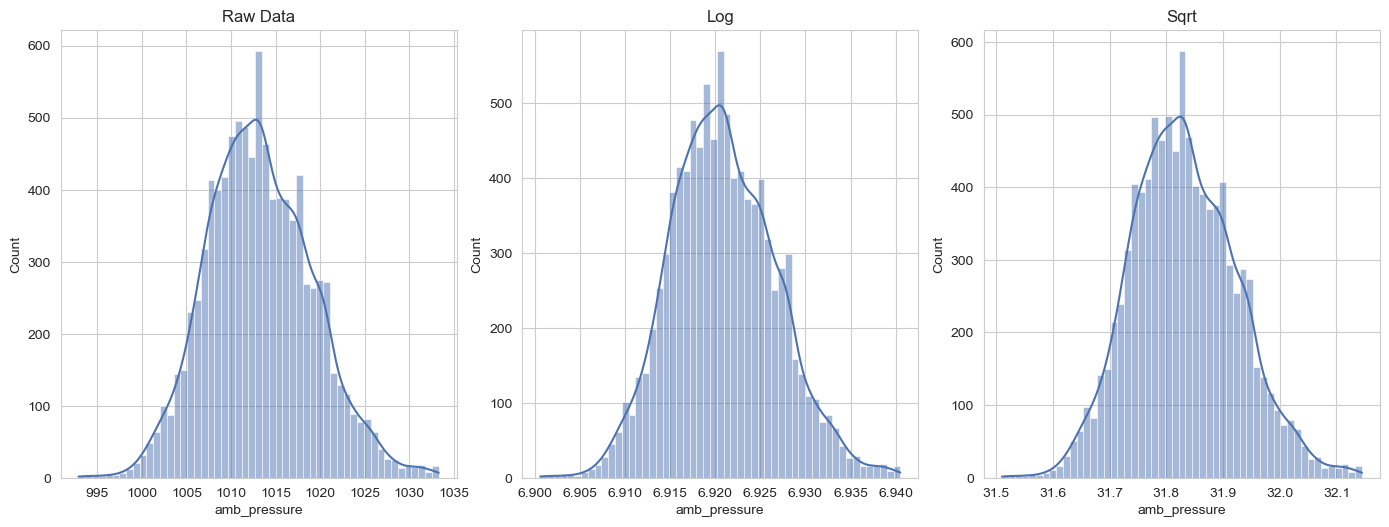

In [63]:
plt.figure(figsize=(14,10))
plt.subplot(231)
sns.histplot(data2['amb_pressure'],kde=True)
plt.title('Raw Data')
plt.subplot(232)
sns.histplot(np.log(data2['amb_pressure']),kde=True)
plt.title('Log')
plt.subplot(233)
sns.histplot(np.sqrt(data2['amb_pressure']),kde=True)
plt.title('Sqrt')
plt.tight_layout()
plt.show()

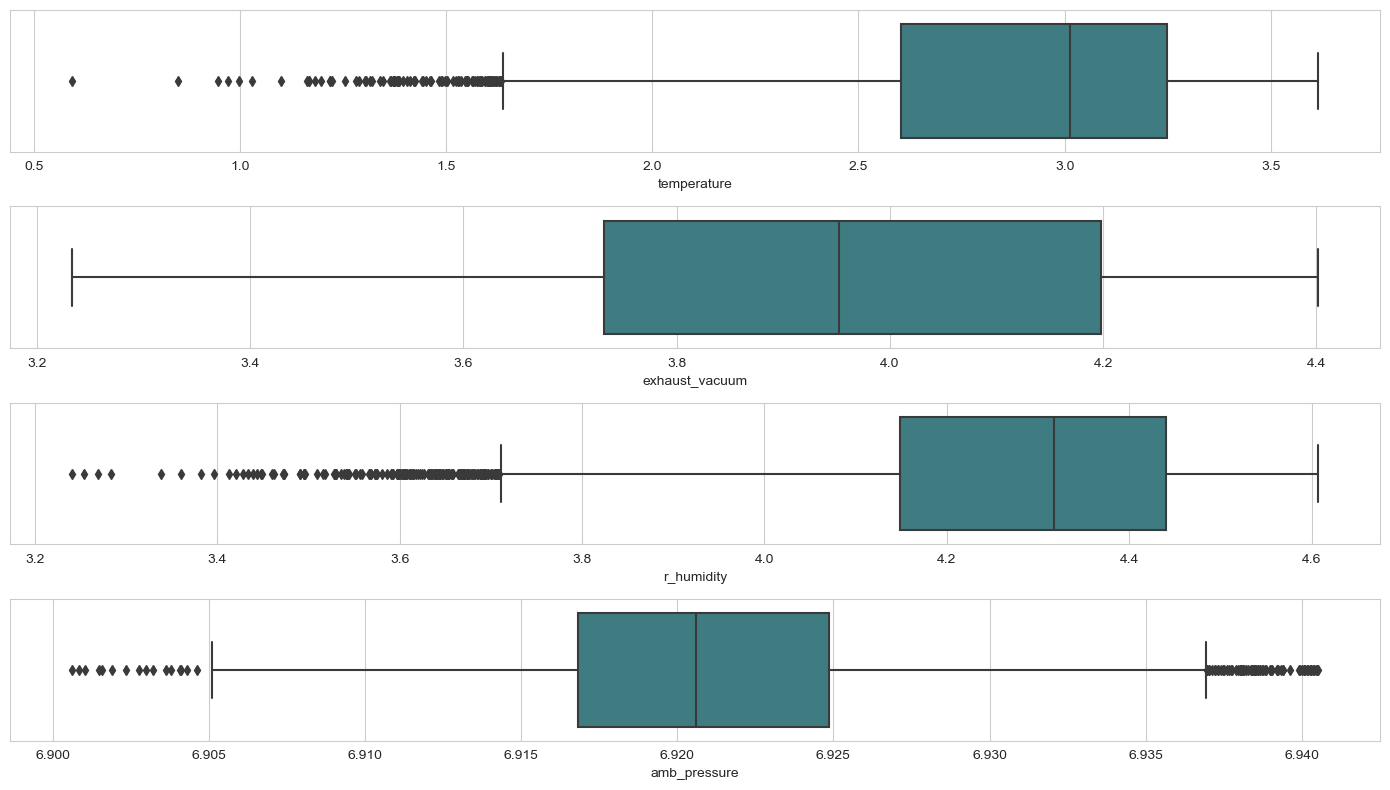

In [64]:
fig,axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='temperature',data=np.log(data2),palette='crest',ax=axes[0])
sns.boxplot(x='exhaust_vacuum',data=np.log(data2),palette='crest',ax=axes[1])
sns.boxplot(x='r_humidity',data=np.log(data2),palette='crest',ax=axes[2])
sns.boxplot(x='amb_pressure',data=np.log(data2),palette='crest',ax=axes[3])
fig.tight_layout()

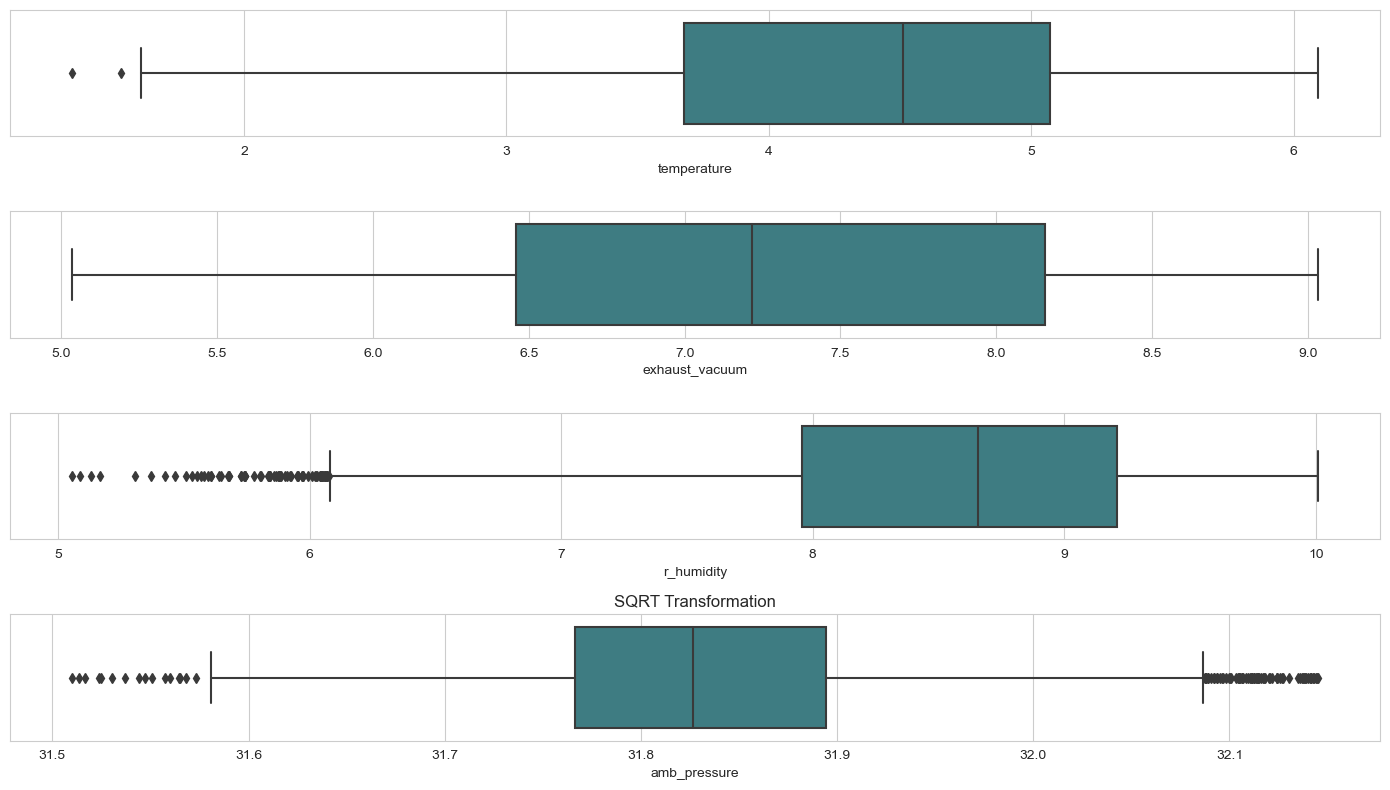

In [65]:
fig,axes=plt.subplots(4,1,figsize=(14,8),sharex=False,sharey=False)
sns.boxplot(x='temperature',data=np.sqrt(data2),palette='crest',ax=axes[0])
sns.boxplot(x='exhaust_vacuum',data=np.sqrt(data2),palette='crest',ax=axes[1])
sns.boxplot(x='r_humidity',data=np.sqrt(data2),palette='crest',ax=axes[2])
sns.boxplot(x='amb_pressure',data=np.sqrt(data2),palette='crest',ax=axes[3])
plt.title('SQRT Transformation')
fig.tight_layout()

### The transformations still contain outliers

## Model Building

In [66]:
data6=data2.copy()

In [67]:
data_raw=data6.copy()
features=data_raw.drop('energy_production',axis=1)
target=data_raw['energy_production']

In [68]:
std=StandardScaler()
data_std=pd.DataFrame(std.fit_transform(data6),columns=data6.columns)
feature_std=data_std.drop('energy_production',axis=1)
target_std=data_std['energy_production']

In [69]:
data_norm=data6.copy()

In [70]:
for i in data_norm.columns:
    data_norm[i]=((data_norm[i]-data_norm[i].min())/(data_norm[i].max()-data_norm[i].min()))
feature_norm=data_norm.drop('energy_production',axis=1)
target_norm=data_norm['energy_production']

In [71]:
data_out=data5.copy()
feature_out=data_out.drop('energy_production',axis=1)
target_out=data_out['energy_production']

In [72]:
data_sqrt=np.sqrt(data6)
feature_sqrt=data_sqrt.drop('energy_production',axis=1)
target_sqrt=data_sqrt['energy_production']

In [73]:
data_cbrt=np.cbrt(data6)
feature_cbrt=data_cbrt.drop('energy_production',axis=1)
target_cbrt=data_cbrt['energy_production']

### Creating Functions

In [74]:
def reg_model(model,x,y):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=100)
    
    model_1=model.fit(xtrain,ytrain)
    train_predt=model_1.predict(xtrain)
    rsquare_train=r2_score(ytrain,train_predt)
    mse_train=mean_squared_error(ytrain,train_predt)
    mae_train=mean_absolute_error(ytrain,train_predt)
    rmse_train=np.sqrt(mse_train)
    
    test_predt=model_1.predict(xtest)
    rsquare_test=r2_score(ytest,test_predt)
    mse_test=mean_squared_error(ytest,test_predt)
    mae_test=mean_absolute_error(ytest,test_predt)
    rmse_test=np.sqrt(mse_test)
    print('Mean Squared Error',mse_train,mse_test)
    print('Root Mean Squared Error',rmse_train,rmse_test)
    print('Mean Absolute Error',mae_train,mae_test)
    print('Rsquared',rsquare_train,rsquare_test)
    return mse_train,mae_train,rmse_train,rsquare_train,mse_test,mae_test,rmse_test,rsquare_test
    

# 1 Linear regression

### 1 Raw Data

In [75]:
mse_raw1,mae_raw1,rmse_raw1,rsquare_raw1,mse_raw2,mae_raw2,rmse_raw2,rsquare_raw2=reg_model(LinearRegression(),features,target)

Mean Squared Error 20.678821823094825 21.039301814115873
Root Mean Squared Error 4.547397258113131 4.586861869962499
Mean Absolute Error 3.625882063052186 3.627070775937826
Rsquared 0.9289991496262052 0.9277638217995361


### 2 Standardized Data

In [76]:
mse_std1,mae_std1,rmse_std1,rsquare_std1,mse_std2,mae_std2,rmse_std2,rsquare_std2=reg_model(LinearRegression(),feature_std,target_std)

Mean Squared Error 0.07099978953801904 0.07223748111030082
Root Mean Squared Error 0.2664578569643219 0.2687703129259272
Mean Absolute Error 0.21246104294110985 0.21253069638682287
Rsquared 0.9289991496262052 0.9277638217995361


### 3 Normalized Data

In [77]:
mse_norm1,mae_norm1,rmse_norm1,rsquare_norm1,mse_norm2,mae_norm2,rmse_norm2,rsquare_norm2=reg_model(LinearRegression(),feature_norm,target_norm)

Mean Squared Error 0.0036277043678952367 0.003690943697928313
Root Mean Squared Error 0.06023042725977657 0.060753137350496665
Mean Absolute Error 0.048024927987446155 0.0480406725289778
Rsquared 0.9289991496262052 0.9277638217995361


### 4 SquareRoot Data

In [78]:
mse_sqrt1,mae_sqrt1,rmse_sqrt1,rsquare_sqrt1,mse_sqrt2,mae_sqrt2,rmse_sqrt2,rsquare_sqrt2=reg_model(LinearRegression(),feature_sqrt,target_sqrt)

Mean Squared Error 0.010599229479010746 0.010667579373465859
Root Mean Squared Error 0.10295255936114821 0.10328397442713878
Mean Absolute Error 0.08222250431377401 0.08266364276213274
Rsquared 0.933521800994636 0.9331116462065117


### 5 CubeRoot Data

In [79]:
mse_cbrt1,mae_cbrt1,rmse_cbrt1,rsquare_cbrt1,mse_cbrt2,mae_cbrt2,rmse_cbrt2,rsquare_cbrt2=reg_model(LinearRegression(),feature_cbrt,target_cbrt)

Mean Squared Error 0.0006347346155400754 0.0006344746784551816
Root Mean Squared Error 0.02519394005589589 0.025188780805254978
Mean Absolute Error 0.02009468881772857 0.020200428398778586
Rsquared 0.9310302149633768 0.9310830927414581


###  6 Outlier Removed Data

In [80]:
mse_no1,mae_no1,rmse_no1,rsquare_no1,mse_no2,mae_no2,rmse_no2,rsquare_no2=reg_model(LinearRegression(),feature_out,target_out)

Mean Squared Error 21.909897853541203 22.15817180576771
Root Mean Squared Error 4.680800984184352 4.707246733045519
Mean Absolute Error 3.7185108551618784 3.711435864856681
Rsquared 0.9247722431910007 0.9239223021134652


# 2 Decision Tree

### 1 Decision Tree Raw Data

In [81]:
def parameter(model,params,x,y):
    grid=GridSearchCV(model,params)
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=100)
    grid.fit(x_train,y_train)
    best=grid.best_params_
    return best

In [81]:
parameter(DecisionTreeRegressor(),{'max_depth':[2,4,8,10,None],'criterion':['squared_error','absolute_error'],'max_features':[0.25,0.35,0.5,0.75,1.0,None],'min_samples_split':[2,3,4,5,6]},features,target)

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 0.75,
 'min_samples_split': 4}

In [83]:
dmse_raw1,dmae_raw1,drmse_raw1,drsquare_raw1,dmse_raw2,dmae_raw2,drmse_raw2,drsquare_raw2=reg_model(DecisionTreeRegressor(criterion='squared_error',max_depth=8,max_features=0.75,min_samples_split=4),features,target)

Mean Squared Error 12.394807926757576 16.71579816368437
Root Mean Squared Error 3.5206260702831784 4.088495831437813
Mean Absolute Error 2.619327553470905 3.0502185660569867
Rsquared 0.9574423576667807 0.9426081062202951


###  2  Decision Tree Standardized Data

In [84]:
parameter(DecisionTreeRegressor(),{'max_depth':[2,4,8,10,None],'criterion':['squared_error','absolute_error'],'max_features':[0.25,0.35,0.5,0.75,1.0,None],'min_samples_split':[2,3,4,5,6]},feature_std,target_std)

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 0.75,
 'min_samples_split': 2}

In [85]:
dmse_std1,dmae_std1,drmse_std1,drsquare_std1,dmse_std2,dmae_std2,drmse_std2,drsquare_std2=reg_model(DecisionTreeRegressor(criterion='squared_error',max_depth=8,max_features=0.75,min_samples_split=2),feature_std,target_std)

Mean Squared Error 0.04175694494661985 0.059266427856765426
Root Mean Squared Error 0.20434516129974756 0.24344697134440885
Mean Absolute Error 0.1542061953718873 0.18334018121541662
Rsquared 0.958242431146445 0.9407346411009373


### 3 Decision Tree SquareRoot Data

In [85]:
parameter(DecisionTreeRegressor(),{'max_depth':[2,4,8,10,None],'criterion':['squared_error','absolute_error'],'max_features':[0.25,0.35,0.5,0.75,1.0,None],'min_samples_split':[2,3,4,5,6]},feature_sqrt,target_sqrt)

{'criterion': 'absolute_error',
 'max_depth': 10,
 'max_features': 0.75,
 'min_samples_split': 2}

In [86]:
dmse_sqrt1,dmae_sqrt1,drmse_sqrt1,drsquare_sqrt1,dmse_sqrt2,dmae_sqrt2,drmse_sqrt2,drsquare_sqrt2=reg_model(DecisionTreeRegressor(criterion='absolute_error',max_depth=10,max_features=0.75,min_samples_split=2),feature_sqrt,target_sqrt)

Mean Squared Error 0.005160477657732089 0.00967648704555965
Root Mean Squared Error 0.07183646468007797 0.0983691366514907
Mean Absolute Error 0.046251368794799914 0.06905382113450838
Rsquared 0.9676335660650809 0.9393260395520063


### 4 Decision Tree Normalized data

In [87]:
parameter(DecisionTreeRegressor(),{'max_depth':[2,4,8,10,None],'criterion':['squared_error','absolute_error'],'max_features':[0.25,0.35,0.5,0.75,1.0,None],'min_samples_split':[2,3,4,5,6]},feature_norm,target_norm)

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 0.75,
 'min_samples_split': 2}

In [87]:
dmse_norm1,dmae_norm1,drmse_norm1,drsquare_norm1,dmse_norm2,dmae_norm2,drmse_norm2,drsquare_norm2=reg_model(DecisionTreeRegressor(criterion='squared_error',max_depth=8,max_features=0.75,min_samples_split=2),feature_norm,target_norm)

Mean Squared Error 0.0022609459739620047 0.0031910161305917315
Root Mean Squared Error 0.047549405611027405 0.056489079746369845
Mean Absolute Error 0.03565759283282608 0.042248498034140956
Rsquared 0.9557491265768033 0.9375480016182961


### 5 Decision Tree CubeRoot Data

In [89]:
parameter(DecisionTreeRegressor(),{'max_depth':[2,4,8,10,None],'criterion':['squared_error','absolute_error'],'max_features':[0.25,0.35,0.5,0.75,1.0,None],'min_samples_split':[2,3,4,5,6]},feature_cbrt,target_cbrt)

{'criterion': 'absolute_error',
 'max_depth': 10,
 'max_features': 0.75,
 'min_samples_split': 3}

In [88]:
dmse_cbrt1,dmae_cbrt1,drmse_cbrt1,drsquare_cbrt1,dmse_cbrt2,dmae_cbrt2,drmse_cbrt2,drsquare_cbrt2=reg_model(DecisionTreeRegressor(criterion='absolute_error',max_depth=10,max_features=0.75,min_samples_split=3),feature_cbrt,target_cbrt)

Mean Squared Error 0.00031610357614101335 0.0005562078280818184
Root Mean Squared Error 0.017779301902521746 0.023584058770318106
Mean Absolute Error 0.01152218596335393 0.016861674607813466
Rsquared 0.9656524236082457 0.9395844710497814


### 6 Decision Tree Outlier Removed Data

In [91]:
parameter(DecisionTreeRegressor(),{'max_depth':[2,4,8,10,None],'criterion':['squared_error','absolute_error'],'max_features':[0.25,0.35,0.5,0.75,1.0,None],'min_samples_split':[2,3,4,5,6]},feature_out,target_out)

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 0.75,
 'min_samples_split': 3}

In [89]:
dmse_no1,dmae_no1,drmse_no1,drsquare_no1,dmse_no2,dmae_no2,drmse_no2,drsquare_no2=reg_model(DecisionTreeRegressor(criterion='squared_error',max_depth=8,max_features=0.75,min_samples_split=3),feature_out,target_out)

Mean Squared Error 12.490843935673965 17.43522516625196
Root Mean Squared Error 3.5342388056940868 4.175550881770208
Mean Absolute Error 2.6582462120762655 3.1447473300188737
Rsquared 0.9571126174930947 0.940138031042951


# 3 RandomForest Regressor

### 1  Raw Data

In [90]:
fmse_raw1,fmae_raw1,frmse_raw1,frsquare_raw1,fmse_raw2,fmae_raw2,frmse_raw2,frsquare_raw2=reg_model(RandomForestRegressor(n_estimators=25),features,target)

Mean Squared Error 1.7795773352954276 11.77311605036789
Root Mean Squared Error 1.3340079967134484 3.431197465953816
Mean Absolute Error 0.928350501672242 2.4454235785953173
Rsquared 0.9938898112671587 0.9595782732477116


### 2 Standardized Data

In [91]:
fmse_std1,fmae_std1,frmse_std1,frsquare_std1,fmse_std2,fmae_std2,frmse_std2,frsquare_std2=reg_model(RandomForestRegressor(n_estimators=25),feature_std,target_std)

Mean Squared Error 0.00650764614791013 0.04017452939829521
Root Mean Squared Error 0.08066998294229477 0.20043584858576374
Mean Absolute Error 0.05502141020225274 0.14373093312818827
Rsquared 0.9934922566187897 0.959826195208775


### 3 SquareRoot Data

In [92]:
fmse_sqrt1,fmae_sqrt1,frmse_sqrt1,frsquare_sqrt1,fmse_sqrt2,fmae_sqrt2,frmse_sqrt2,frsquare_sqrt2=reg_model(RandomForestRegressor(n_estimators=25),feature_sqrt,target_sqrt)

Mean Squared Error 0.001028005416214145 0.006479296128287777
Root Mean Squared Error 0.0320625235471905 0.08049407511294093
Mean Absolute Error 0.021922198986394654 0.05737486628697607
Rsquared 0.9935523663514403 0.9593732151794727


### 4 Normalized Data

In [93]:
fmse_norm1,fmae_norm1,frmse_norm1,frsquare_norm1,fmse_norm2,fmae_norm2,frmse_norm2,frsquare_norm2=reg_model(RandomForestRegressor(n_estimators=25),feature_norm,target_norm)

Mean Squared Error 0.00031941505018971526 0.002095893534658384
Root Mean Squared Error 0.017872186497172506 0.04578092981426201
Mean Absolute Error 0.012390478194422912 0.03285758710048949
Rsquared 0.9937484596632619 0.9589808593006276


### 5 CubeRoot Data

In [94]:
fmse_cbrt1,fmae_cbrt1,frmse_cbrt1,frsquare_cbrt1,fmse_cbrt2,fmae_cbrt2,frmse_cbrt2,frsquare_cbrt2=reg_model(RandomForestRegressor(n_estimators=25),feature_cbrt,target_cbrt)

Mean Squared Error 5.818993898462387e-05 0.0003777356784531371
Root Mean Squared Error 0.0076282330185059154 0.019435423289785512
Mean Absolute Error 0.005285603821437337 0.013899240067088536
Rsquared 0.9936771250774642 0.958970191239813


### 6 Outlier Removed Data

In [95]:
fmse_no1,fmae_no1,frmse_no1,frsquare_no1,fmse_no2,fmae_no2,frmse_no2,frsquare_no2=reg_model(RandomForestRegressor(n_estimators=25),feature_out,target_out)

Mean Squared Error 1.82149956974359 11.760937634314397
Root Mean Squared Error 1.3496294194124512 3.429422347030823
Mean Absolute Error 0.934389464882943 2.4457302675585306
Rsquared 0.9937458710407351 0.9596200865283999


# 4 XGBOOST Regression

### 1 Raw Data

In [96]:
xmse_raw1,xmae_raw1,xrmse_raw1,xrsquare_raw1,xmse_raw2,xmae_raw2,xrmse_raw2,xrsquare_raw2=reg_model(XGBRegressor(),features,target)

Mean Squared Error 3.6365256473685696 9.867808021104109
Root Mean Squared Error 1.9069676576619148 3.141306737824899
Mean Absolute Error 1.4107092062313284 2.2608736682496344
Rsquared 0.9875139688528618 0.9661199432871771


### 2 Standardized Data

In [97]:
xmse_std1,xmae_std1,xrmse_std1,xrsquare_std1,xmse_std2,xmae_std2,xrmse_std2,xrsquare_std2=reg_model(XGBRegressor(),feature_std,target_std)

Mean Squared Error 0.010774352797192781 0.03435516643919768
Root Mean Squared Error 0.10379957994709219 0.18535146732410207
Mean Absolute Error 0.07687671160482051 0.1323163309505756
Rsquared 0.9892254862189651 0.9656454532070526


### 3 SquareRoot Data

In [98]:
xmse_sqrt1,xmae_sqrt1,xrmse_sqrt1,xrsquare_sqrt1,xmse_sqrt2,xmae_sqrt2,xrmse_sqrt2,xrsquare_sqrt2=reg_model(XGBRegressor(),feature_sqrt,target_sqrt)

Mean Squared Error 0.00203553218527301 0.005580454116140702
Root Mean Squared Error 0.04511687251209918 0.07470243714993978
Mean Absolute Error 0.03340914697055171 0.05363442169555886
Rsquared 0.9872331744526931 0.9650091762919337


### 4 CubeRoot Data

In [99]:
xmse_cbrt1,xmae_cbrt1,xrmse_cbrt1,xrsquare_cbrt1,xmse_cbrt2,xmae_cbrt2,xrmse_cbrt2,xrsquare_cbrt2=reg_model(XGBRegressor(),feature_cbrt,target_cbrt)

Mean Squared Error 0.00012460363247755637 0.00031840638594068856
Root Mean Squared Error 0.011162599718594068 0.017843945358039195
Mean Absolute Error 0.008266691618519688 0.012937777969433571
Rsquared 0.9864606631868545 0.9654145640235318


### 5 Normalized Data

In [100]:
xmse_norm1,xmae_norm1,xrmse_norm1,xrsquare_norm1,xmse_norm2,xmae_norm2,xrmse_norm2,xrsquare_norm2=reg_model(XGBRegressor(),feature_norm,target_norm)

Mean Squared Error 0.0005804632996875101 0.0017128812703016453
Root Mean Squared Error 0.024092805973723985 0.04138696981299362
Mean Absolute Error 0.01765615188897499 0.029641813769098746
Rsquared 0.9886392650257486 0.9664768669467388


### 6 Outlier Removed Data

In [101]:
xmse_no1,xmae_no1,xrmse_no1,xrsquare_no1,xmse_no2,xmae_no2,xrmse_no2,xrsquare_no2=reg_model(XGBRegressor(),feature_out,target_out)

Mean Squared Error 3.6669595516070914 10.193514417129254
Root Mean Squared Error 1.9149306910713744 3.1927283656974725
Mean Absolute Error 1.4062732185355262 2.2836107260407412
Rsquared 0.9874094738724604 0.9650016654340348


# 5 Regularization 

In [102]:
lasso=Lasso()
ridge=Ridge()

### 1 Lasso Regularization

In [103]:
parameter(lasso,{'alpha':[1,2,5,15,20,30,40,45,50]},features,target)

{'alpha': 1}

In [104]:
lmse_raw1,lmae_raw1,lrmse_raw1,lrsquare_raw1,lmse_raw2,lmae_raw2,lrmse_raw2,lrsquare_raw2=reg_model(Lasso(alpha=1),features,target)

Mean Squared Error 20.74347212975324 21.16113923582096
Root Mean Squared Error 4.554500206362191 4.60012382831386
Mean Absolute Error 3.633755865781476 3.6408042213986977
Rsquared 0.9287771724367433 0.9273455061261582


### 2 Ridge Regularization

In [105]:
parameter(ridge,{'alpha':[1,2,5,15,20,30,40,45,50]},features,target)

{'alpha': 15}

In [106]:
imse_raw1,imae_raw1,irmse_raw1,irsquare_raw1,imse_raw2,imae_raw2,irmse_raw2,irsquare_raw2=reg_model(Ridge(alpha=15),features,target)

Mean Squared Error 20.678823495942673 21.039417830543144
Root Mean Squared Error 4.547397442047778 4.586874516546441
Mean Absolute Error 3.625917391110878 3.627131316668124
Rsquared 0.9289991438824728 0.9277634234696206


# 6 KNN

In [107]:
parameter(KNeighborsRegressor(),{'n_neighbors':[1,2,3,4,5,6,7,8,9,10,15,20,30,40,45,50]},features,target)

{'n_neighbors': 5}

In [108]:
kmse_raw1,kmae_raw1,krmse_raw1,krsquare_raw1,kmse_raw2,kmae_raw2,krmse_raw2,krsquare_raw2=reg_model(KNeighborsRegressor(n_neighbors=5),features,target)

Mean Squared Error 10.322721070791529 15.808653749163872
Root Mean Squared Error 3.2128991690981414 3.9760097772973184
Mean Absolute Error 2.328741081382386 2.935586956521739
Rsquared 0.9645568794746742 0.9457226889264994


In [109]:
Result=pd.DataFrame({'Models':['Linear Regression Raw Data','Linear Regression Standardized Data','Linear Regression Normalized Data','Linear Regression SquareRoot Data','Linear Regression CubeRoot Data','Linear Regression Outlier Removed Data',
                     'DecisionTree Raw Data','DecisionTree Standardized Data','DecisionTree Normalized Data','DecisionTree SquareRoot Data','DecisionTree CubeRoot Data','DecisionTree Outlier Removed Data',
                    'RandomForest Raw Data','RandomForest Standardized Data','RandomForest Normalized Data','RandomForest SquareRoot Data','RandomForest CubeRoot Data','RandomForest Outlier Removed Data',
                    'XGBoost Raw Data','XGBoost Standardized Data','XGBoost Normalized Data','XGBoost SquareRoot Data','XGBoost CubeRoot Data','XGBoost Outlier Removed Data',
                    'Lasso Regularization','Ridge Regularization','KNN'],
                     'Training MSE':[mse_raw1,mse_std1,mse_norm1,mse_sqrt1,mse_cbrt1,mse_no1,dmse_raw1,dmse_std1,dmse_norm1,dmse_sqrt1,dmae_cbrt1,dmse_no1,fmse_raw1,fmse_std1,fmse_norm1,fmse_sqrt1,fmse_cbrt1,fmse_no1,xmse_raw1,xmse_std1,xmse_norm1,xmse_sqrt1,xmse_cbrt1,xmse_no1,lmse_raw1,imse_raw1,kmse_raw1],
                    'Training RMSE':[rmse_raw1,rmse_std1,rmse_norm1,rmse_sqrt1,rmse_cbrt1,rmse_no1,drmse_raw1,drmse_std1,drmse_norm1,drmse_sqrt1,drmse_cbrt1,drmse_no1,frmse_raw1,frmse_std1,frmse_norm1,frmse_sqrt1,frmse_cbrt1,frmse_no1,xrmse_raw1,xrmse_std1,xrmse_norm1,xrmse_sqrt1,xrmse_cbrt1,xrmse_no1,lrmse_raw1,irmse_raw1,krmse_raw1],
                    'Training MAE':[mae_raw1,mae_std1,mae_norm1,mae_sqrt1,mae_cbrt1,mae_no1,dmae_raw1,dmae_std1,dmae_norm1,dmae_sqrt1,dmae_cbrt1,dmae_no1,fmae_raw1,fmae_std1,fmae_norm1,fmae_sqrt1,fmae_cbrt1,fmae_no1,xmae_raw1,xmae_std1,xmae_norm1,xmae_sqrt1,xmae_cbrt1,xmae_no1,lmae_raw1,imae_raw1,kmae_raw1],
                    'Training Rsquare':[rsquare_raw1,rsquare_std1,rsquare_norm1,rsquare_sqrt1,rsquare_cbrt1,rsquare_no1,drsquare_raw1,drsquare_std1,drsquare_norm1,drsquare_sqrt1,drsquare_cbrt1,drsquare_no1,frsquare_raw1,frsquare_std1,frsquare_norm1,frsquare_sqrt1,frsquare_cbrt1,frsquare_no1,xrsquare_raw1,xrsquare_std1,xrsquare_norm1,xrsquare_sqrt1,xrsquare_cbrt1,xrsquare_no1,lrsquare_raw1,irsquare_raw1,krsquare_raw1],
                    
                    'Testing MSE':[mse_raw2,mse_std2,mse_norm2,mse_sqrt2,mse_cbrt2,mse_no2,dmse_raw2,dmse_std2,dmse_norm2,dmse_sqrt2,dmae_cbrt2,dmse_no2,fmse_raw2,fmse_std2,fmse_norm2,fmse_sqrt2,fmse_cbrt2,fmse_no2,xmse_raw2,xmse_std2,xmse_norm2,xmse_sqrt2,xmse_cbrt2,xmse_no2,lmse_raw2,imse_raw2,kmse_raw2],
                    'Testing RMSE':[rmse_raw2,rmse_std2,rmse_norm2,rmse_sqrt2,rmse_cbrt2,rmse_no2,drmse_raw2,drmse_std2,drmse_norm2,drmse_sqrt2,drmse_cbrt2,drmse_no2,frmse_raw2,frmse_std2,frmse_norm2,frmse_sqrt2,frmse_cbrt2,frmse_no2,xrmse_raw2,xrmse_std2,xrmse_norm2,xrmse_sqrt2,xrmse_cbrt2,xrmse_no2,lrmse_raw2,irmse_raw2,krmse_raw2],
                    'Testing MAE':[mae_raw2,mae_std2,mae_norm2,mae_sqrt2,mae_cbrt2,mae_no2,dmae_raw2,dmae_std2,dmae_norm2,dmae_sqrt2,dmae_cbrt2,dmae_no2,fmae_raw2,fmae_std2,fmae_norm1,fmae_sqrt2,fmae_cbrt2,fmae_no2,xmae_raw2,xmae_std2,xmae_norm2,xmae_sqrt2,xmae_cbrt2,xmae_no2,lmae_raw2,imae_raw2,kmae_raw2],
                    'Testing Rsquare':[rsquare_raw2,rsquare_std2,rsquare_norm2,rsquare_sqrt2,rsquare_cbrt2,rsquare_no2,drsquare_raw2,drsquare_std2,drsquare_norm2,drsquare_sqrt2,drsquare_cbrt2,drsquare_no2,frsquare_raw2,frsquare_std2,frsquare_norm2,frsquare_sqrt2,frsquare_cbrt2,frsquare_no2,xrsquare_raw2,xrsquare_std2,xrsquare_norm2,xrsquare_sqrt2,xrsquare_cbrt2,xrsquare_no2,lrsquare_raw2,irsquare_raw2,krsquare_raw2],
                    })

In [110]:
Result.set_index('Models')

,Training MSE,Training RMSE,Training MAE,Training Rsquare,Testing MSE,Testing RMSE,Testing MAE,Testing Rsquare
Models,,,,,,,,
Linear Regression Raw Data,20.678822,4.547397,3.625882,0.928999,21.039302,4.586862,3.627071,0.927764
Linear Regression Standardized Data,0.071000,0.266458,0.212461,0.928999,0.072237,0.268770,0.212531,0.927764
Linear Regression Normalized Data,0.003628,0.060230,0.048025,0.928999,0.003691,0.060753,0.048041,0.927764
Linear Regression SquareRoot Data,0.010599,0.102953,0.082223,0.933522,0.010668,0.103284,0.082664,0.933112
Linear Regression CubeRoot Data,0.000635,0.025194,0.020095,0.931030,0.000634,0.025189,0.020200,0.931083
Linear Regression Outlier Removed Data,21.909898,4.680801,3.718511,0.924772,22.158172,4.707247,3.711436,0.923922
DecisionTree Raw Data,12.394808,3.520626,2.619328,0.957442,16.715798,4.088496,3.050219,0.942608
DecisionTree Standardized Data,0.041757,0.204345,0.154206,0.958242,0.059266,0.243447,0.183340,0.940735
DecisionTree Normalized Data,0.002261,0.047549,0.035658,0.955749,0.003191,0.056489,0.042248,0.937548


In [111]:
Result_copy=Result.copy()

### Sorting Models Based On The Testing Rsquare

In [112]:
Result_copy.sort_values(by='Testing Rsquare',ascending=False,inplace=True)
Result_copy.set_index('Models',inplace=True)
Result_copy

,Training MSE,Training RMSE,Training MAE,Training Rsquare,Testing MSE,Testing RMSE,Testing MAE,Testing Rsquare
Models,,,,,,,,
XGBoost Normalized Data,0.000580,0.024093,0.017656,0.988639,0.001713,0.041387,0.029642,0.966477
XGBoost Raw Data,3.636526,1.906968,1.410709,0.987514,9.867808,3.141307,2.260874,0.966120
XGBoost Standardized Data,0.010774,0.103800,0.076877,0.989225,0.034355,0.185351,0.132316,0.965645
XGBoost CubeRoot Data,0.000125,0.011163,0.008267,0.986461,0.000318,0.017844,0.012938,0.965415
XGBoost SquareRoot Data,0.002036,0.045117,0.033409,0.987233,0.005580,0.074702,0.053634,0.965009
XGBoost Outlier Removed Data,3.666960,1.914931,1.406273,0.987409,10.193514,3.192728,2.283611,0.965002
RandomForest Standardized Data,0.006508,0.080670,0.055021,0.993492,0.040175,0.200436,0.143731,0.959826
RandomForest Outlier Removed Data,1.821500,1.349629,0.934389,0.993746,11.760938,3.429422,2.445730,0.959620
RandomForest Raw Data,1.779577,1.334008,0.928351,0.993890,11.773116,3.431197,2.445424,0.959578


### Sorting Models  Based On Training Rsquare 

In [113]:
Result_copy1=Result.copy()
Result_copy1.sort_values(by='Training Rsquare',ascending=False,inplace=True)
Result_copy1.set_index('Models',inplace=True)
Result_copy1

,Training MSE,Training RMSE,Training MAE,Training Rsquare,Testing MSE,Testing RMSE,Testing MAE,Testing Rsquare
Models,,,,,,,,
RandomForest Raw Data,1.779577,1.334008,0.928351,0.993890,11.773116,3.431197,2.445424,0.959578
RandomForest Normalized Data,0.000319,0.017872,0.012390,0.993748,0.002096,0.045781,0.012390,0.958981
RandomForest Outlier Removed Data,1.821500,1.349629,0.934389,0.993746,11.760938,3.429422,2.445730,0.959620
RandomForest CubeRoot Data,0.000058,0.007628,0.005286,0.993677,0.000378,0.019435,0.013899,0.958970
RandomForest SquareRoot Data,0.001028,0.032063,0.021922,0.993552,0.006479,0.080494,0.057375,0.959373
RandomForest Standardized Data,0.006508,0.080670,0.055021,0.993492,0.040175,0.200436,0.143731,0.959826
XGBoost Standardized Data,0.010774,0.103800,0.076877,0.989225,0.034355,0.185351,0.132316,0.965645
XGBoost Normalized Data,0.000580,0.024093,0.017656,0.988639,0.001713,0.041387,0.029642,0.966477
XGBoost Raw Data,3.636526,1.906968,1.410709,0.987514,9.867808,3.141307,2.260874,0.966120


### Visualizing The Models Based On The Testing Rsquare

<Axes: xlabel='Testing Rsquare', ylabel='Models'>

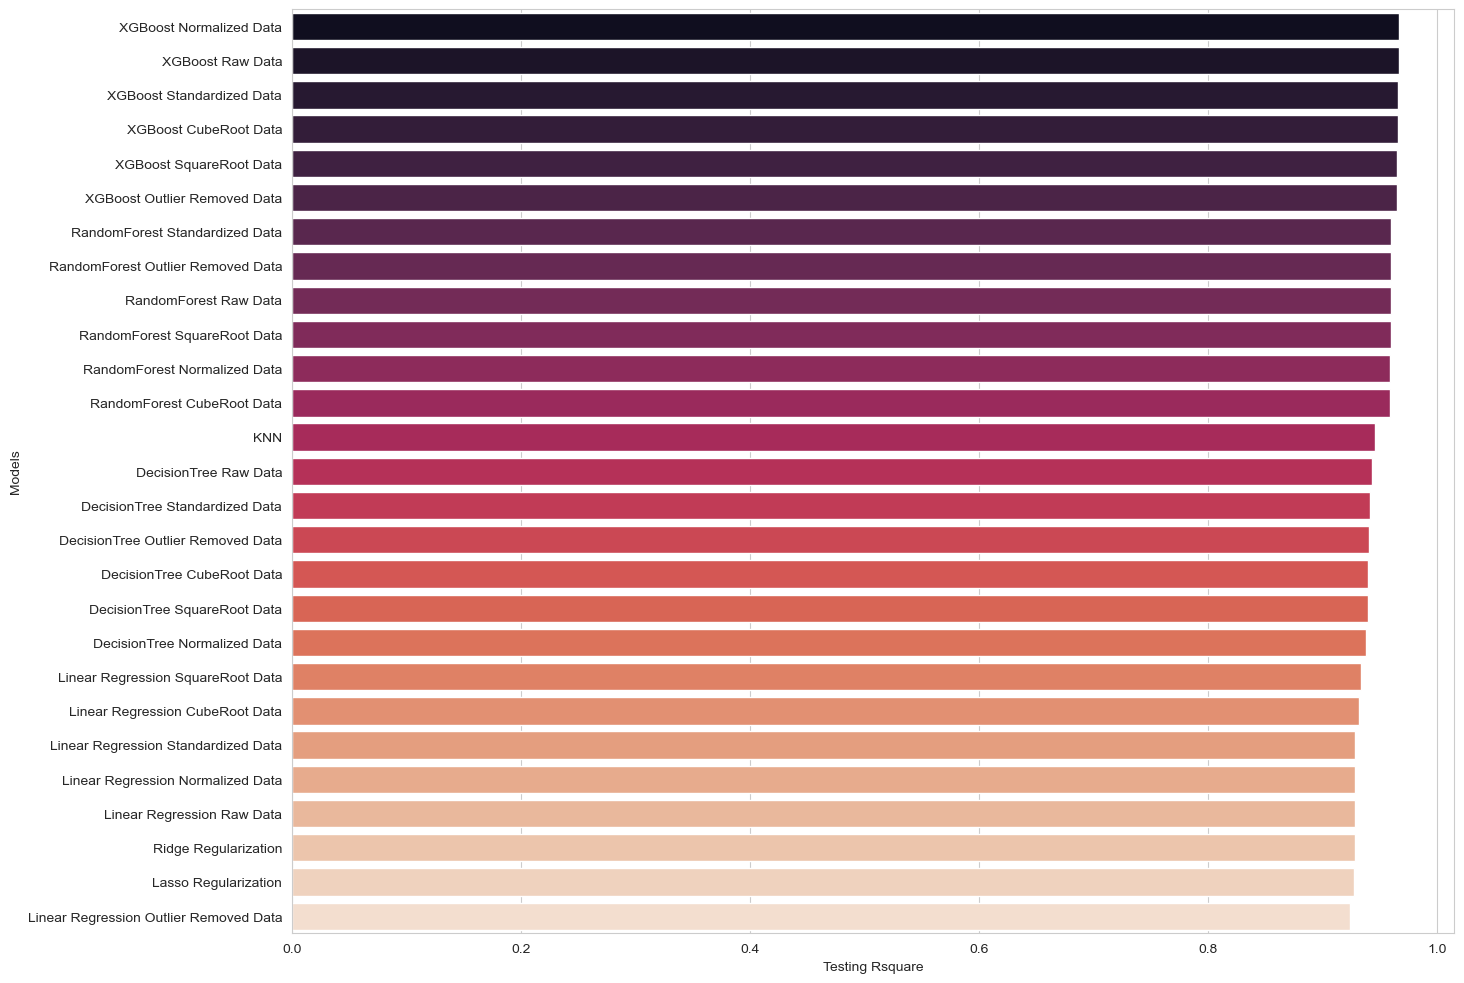

In [114]:
plt.figure(figsize=(15,12))
sns.barplot(x='Testing Rsquare',y=Result_copy.index,data=Result_copy,palette='rocket')

### Visualizing The Models Based On The Training Rsquare

<Axes: xlabel='Training Rsquare', ylabel='Models'>

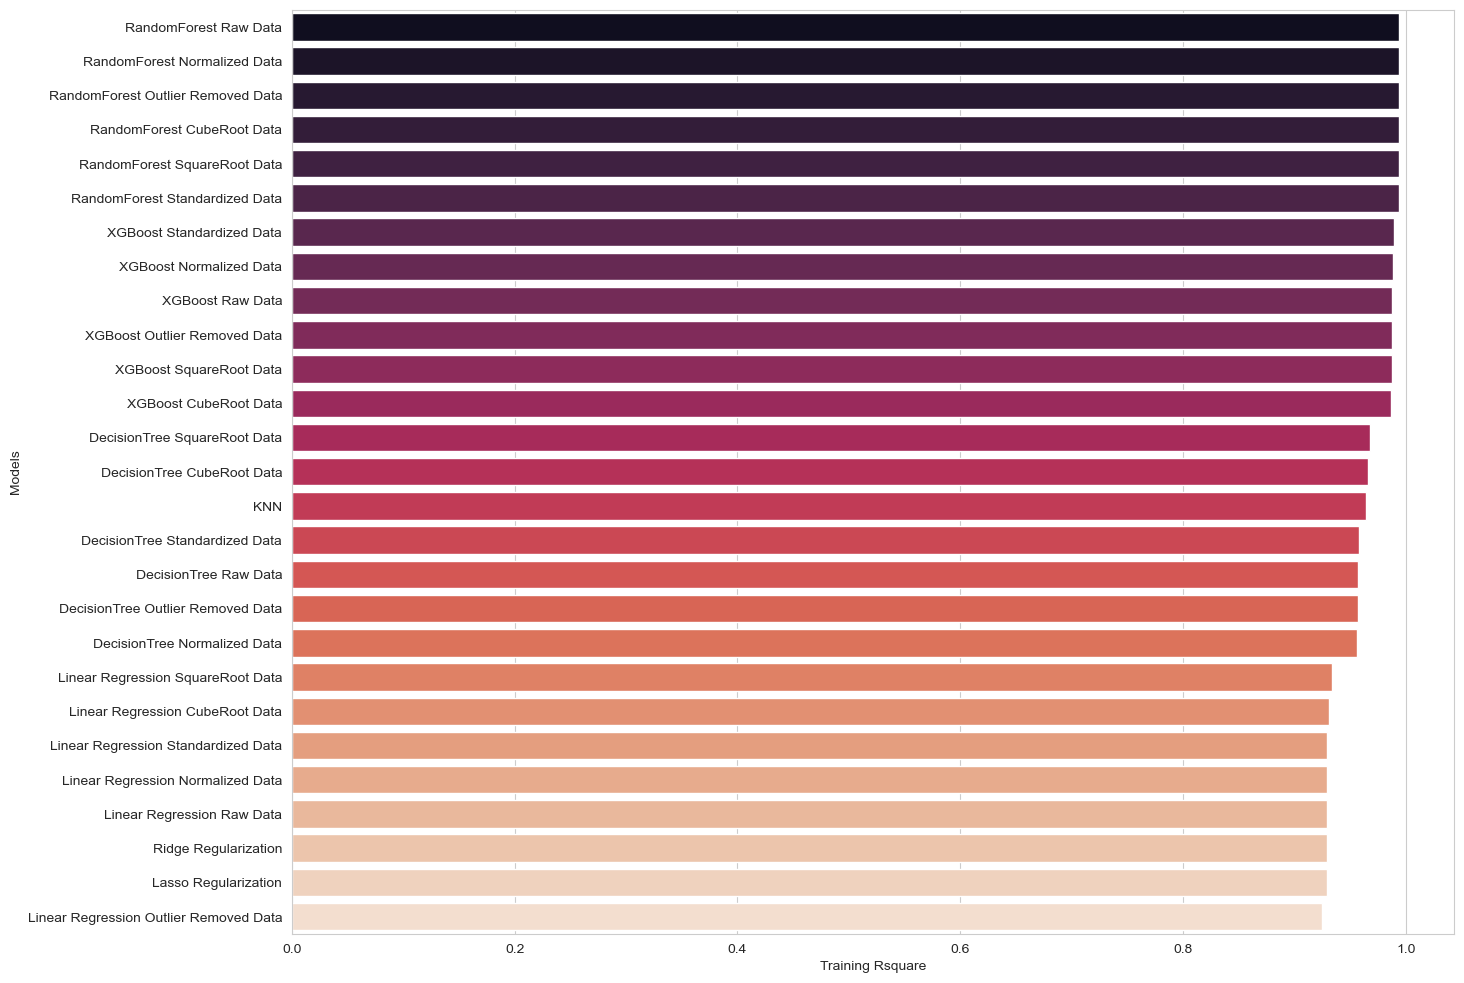

In [115]:
plt.figure(figsize=(15,12))
sns.barplot(x='Training Rsquare',y=Result_copy1.index,data=Result_copy1,palette='rocket')

# The best model is XGBoost with Square Root Data

In [116]:
data_cbrt

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,2.124579,3.378410,10.056382,3.917041,7.836797
1,2.291969,3.485381,10.065306,4.557613,7.749310
2,2.402659,3.559000,10.080746,4.339000,7.749976
3,2.393966,3.786750,10.059281,4.292288,7.758679
4,2.473861,3.675169,10.078647,4.217163,7.739417
...,...,...,...,...,...
9563,2.576313,3.676402,10.018399,4.341300,7.704422
9564,2.913453,4.027724,10.051138,3.751555,7.645571
9565,3.122350,3.831320,10.017270,3.831320,7.543979
9566,2.843867,4.042260,10.068233,4.314070,7.498192


In [116]:
features=data_cbrt.drop('energy_production',axis=1)
target=data_cbrt['energy_production']
model_final_raw=XGBRegressor().fit(features,target)

In [120]:
model_final_raw.predict(features)

array([7.823968 , 7.7605796, 7.7621384, ..., 7.556628 , 7.53275  ,
       7.699098 ], dtype=float32)

## Importing Our Model As Pickle File 

In [121]:
pickle.dump(model_final_raw,open('cubrt_model.pkl','wb'))

In [1]:
from sklearn.metrics import confusion_matrix